## Data Preprocessing Overview

The preprocessing stage ensures that disaster data is clean, consistent, and ready for clustering and classification analysis. Key steps include:

### 1. Loading and Initial Inspection
- The dataset is read into a Pandas DataFrame.
- Initial data shape and column details are displayed to understand structure and missing values.

### 2. Filtering Disaster Types
- Retains only major geophysical, meteorological, and hydrological disasters such as:
  - Earthquakes
  - Floods
  - Wildfires
  - Landslides
  - Storms
  - Droughts
- Removes biological disasters (e.g., epidemics, animal infestations) to maintain focus on natural environmental events.

### 3. Handling Missing Values
- Replaces missing placeholders (`'?'`) with NaN values.
- Drops columns with excessive missing data (>50% missing values).
- Removes rows with missing critical attributes such as:
  - `Disaster Subtype`
  - `Location`
  - `CPI (Consumer Price Index)`

### 4. Converting Numeric Columns
- Converts key attributes to numerical format for computation:
  - `Total Deaths`
  - `No Affected`
  - `Total Affected`

### 5. Categorizing Impact
- Assigns impact severity labels based on thresholds:
  - **Low Impact**: Fewer than 100 deaths or 10,000 affected.
  - **Moderate Impact**: Between 100-500 deaths or 10,000-50,000 affected.
  - **Severe Impact**: Between 500-1000 deaths or 50,000-100,000 affected.
  - **Catastrophic**: More than 1000 deaths or over 100,000 affected.

### 6. Aggregating Data
- Summarizes key impact metrics (`Total Deaths`, `Total Affected`) per disaster type for further analysis.

### 7. Visualizations and Their Significance

#### **7.1 Total Deaths and Affected Population (Bar Charts)**
- **Purpose**: Identify which disasters cause the most fatalities and impact.
- **Insights**:
  - High-mortality disasters such as earthquakes and tsunamis.
  - Disasters with widespread impact, like floods and droughts.

#### **7.2 Monthly Disaster Occurrences (Line Chart)**
- **Purpose**: Reveal seasonal patterns in disaster frequency.
- **Insights**:
  - Increased flooding and storms in monsoon seasons.
  - Seasonal peaks in wildfires due to dry conditions.

#### **7.3 Correlation Analysis (Heatmap)**
- **Purpose**: Understand relationships between disaster attributes.
- **Insights**:
  - Strong correlations between economic loss, total affected, and CPI.
  - Certain terrain types linked to specific disaster patterns.


This cleaned dataset will be used for classification and clustering techniques to identify disaster patterns and assess the influence of terrain types on severity.


Initial data: 16126 instances, 45 attributes
After filtering disaster types: 8336 instances, 45 attributes
After handling missing values: 5484 instances, 24 attributes
After filtering non-biological disasters: 5484 instances
Columns converted to numeric.
Year                int64
Start Year          int64
Start Month       float64
Start Day         float64
End Year            int64
End Month         float64
End Day           float64
Total Deaths      float64
No Affected       float64
Total Affected    float64
dtype: object
Impact categories added.
Aggregation by Disaster Type:
  Disaster Type  Total Deaths   No Affected  Total Affected
0       Drought       23605.0  1.212551e+09    1.212551e+09
1    Earthquake     2332692.0  1.741563e+08    2.022526e+08
2         Flood      697252.0  2.673562e+09    2.737434e+09
3      Wildfire        3933.0  1.375115e+07    1.396519e+07


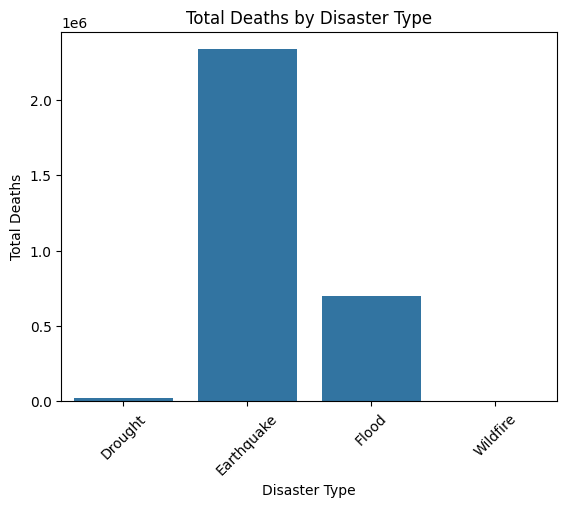

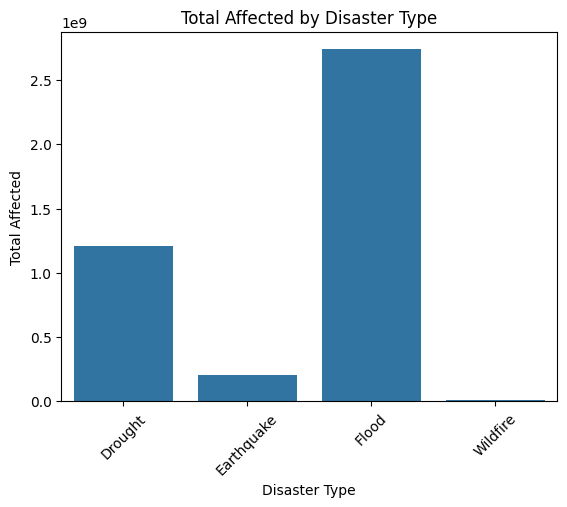

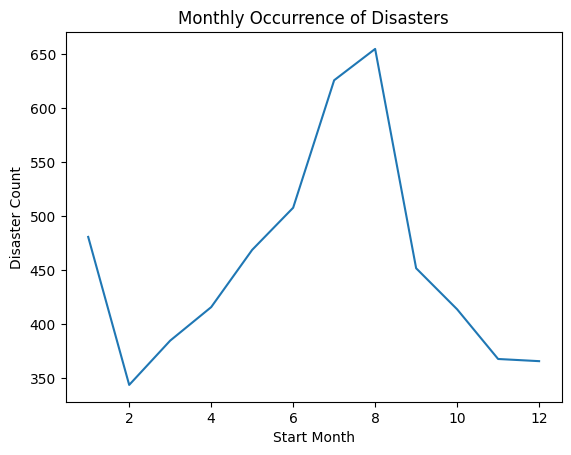

C:\Users\ZBOOK\AppData\Local\Temp\ipykernel_13928\20815053.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Deaths Category', palette='viridis')


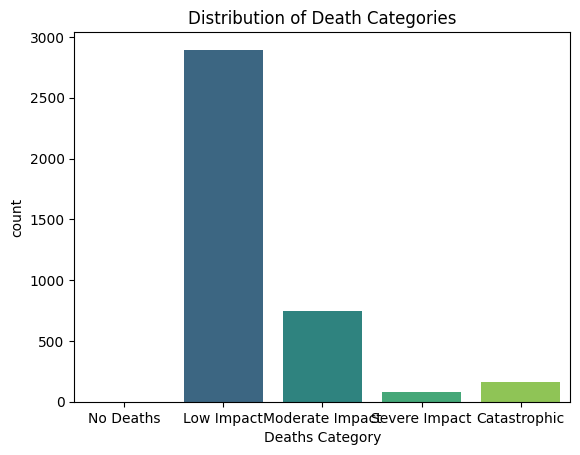

C:\Users\ZBOOK\AppData\Local\Temp\ipykernel_13928\20815053.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Affected Category', palette='muted')


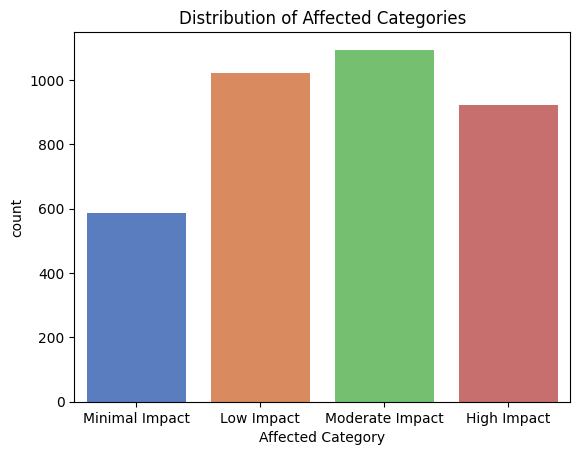


DATA VALIDATION STATISTICS:
--------------------------------------------------
Missing Values Check:
Start Day             588
End Day               597
Total Deaths         1597
No Affected          1859
Total Affected        911
Adm Level            1874
Geo Locations        1874
Deaths Category      1597
Affected Category    1859
dtype: int64

Numerical Columns Statistics:
        Total Deaths   No Affected  Total Affected
count    3887.000000  3.625000e+03    4.573000e+03
mean      786.591716  1.123868e+06    9.110436e+05
std     11243.632543  1.100639e+07    9.939469e+06
min         1.000000  9.000000e+00    1.000000e+00
25%         5.000000  2.000000e+03    1.143000e+03
50%        15.000000  1.301000e+04    9.000000e+03
75%        50.000000  1.000000e+05    6.744700e+04
max    500000.000000  3.300000e+08    3.300000e+08

Data Types Verification:
Total Deaths      float64
No Affected       float64
Total Affected    float64
dtype: object


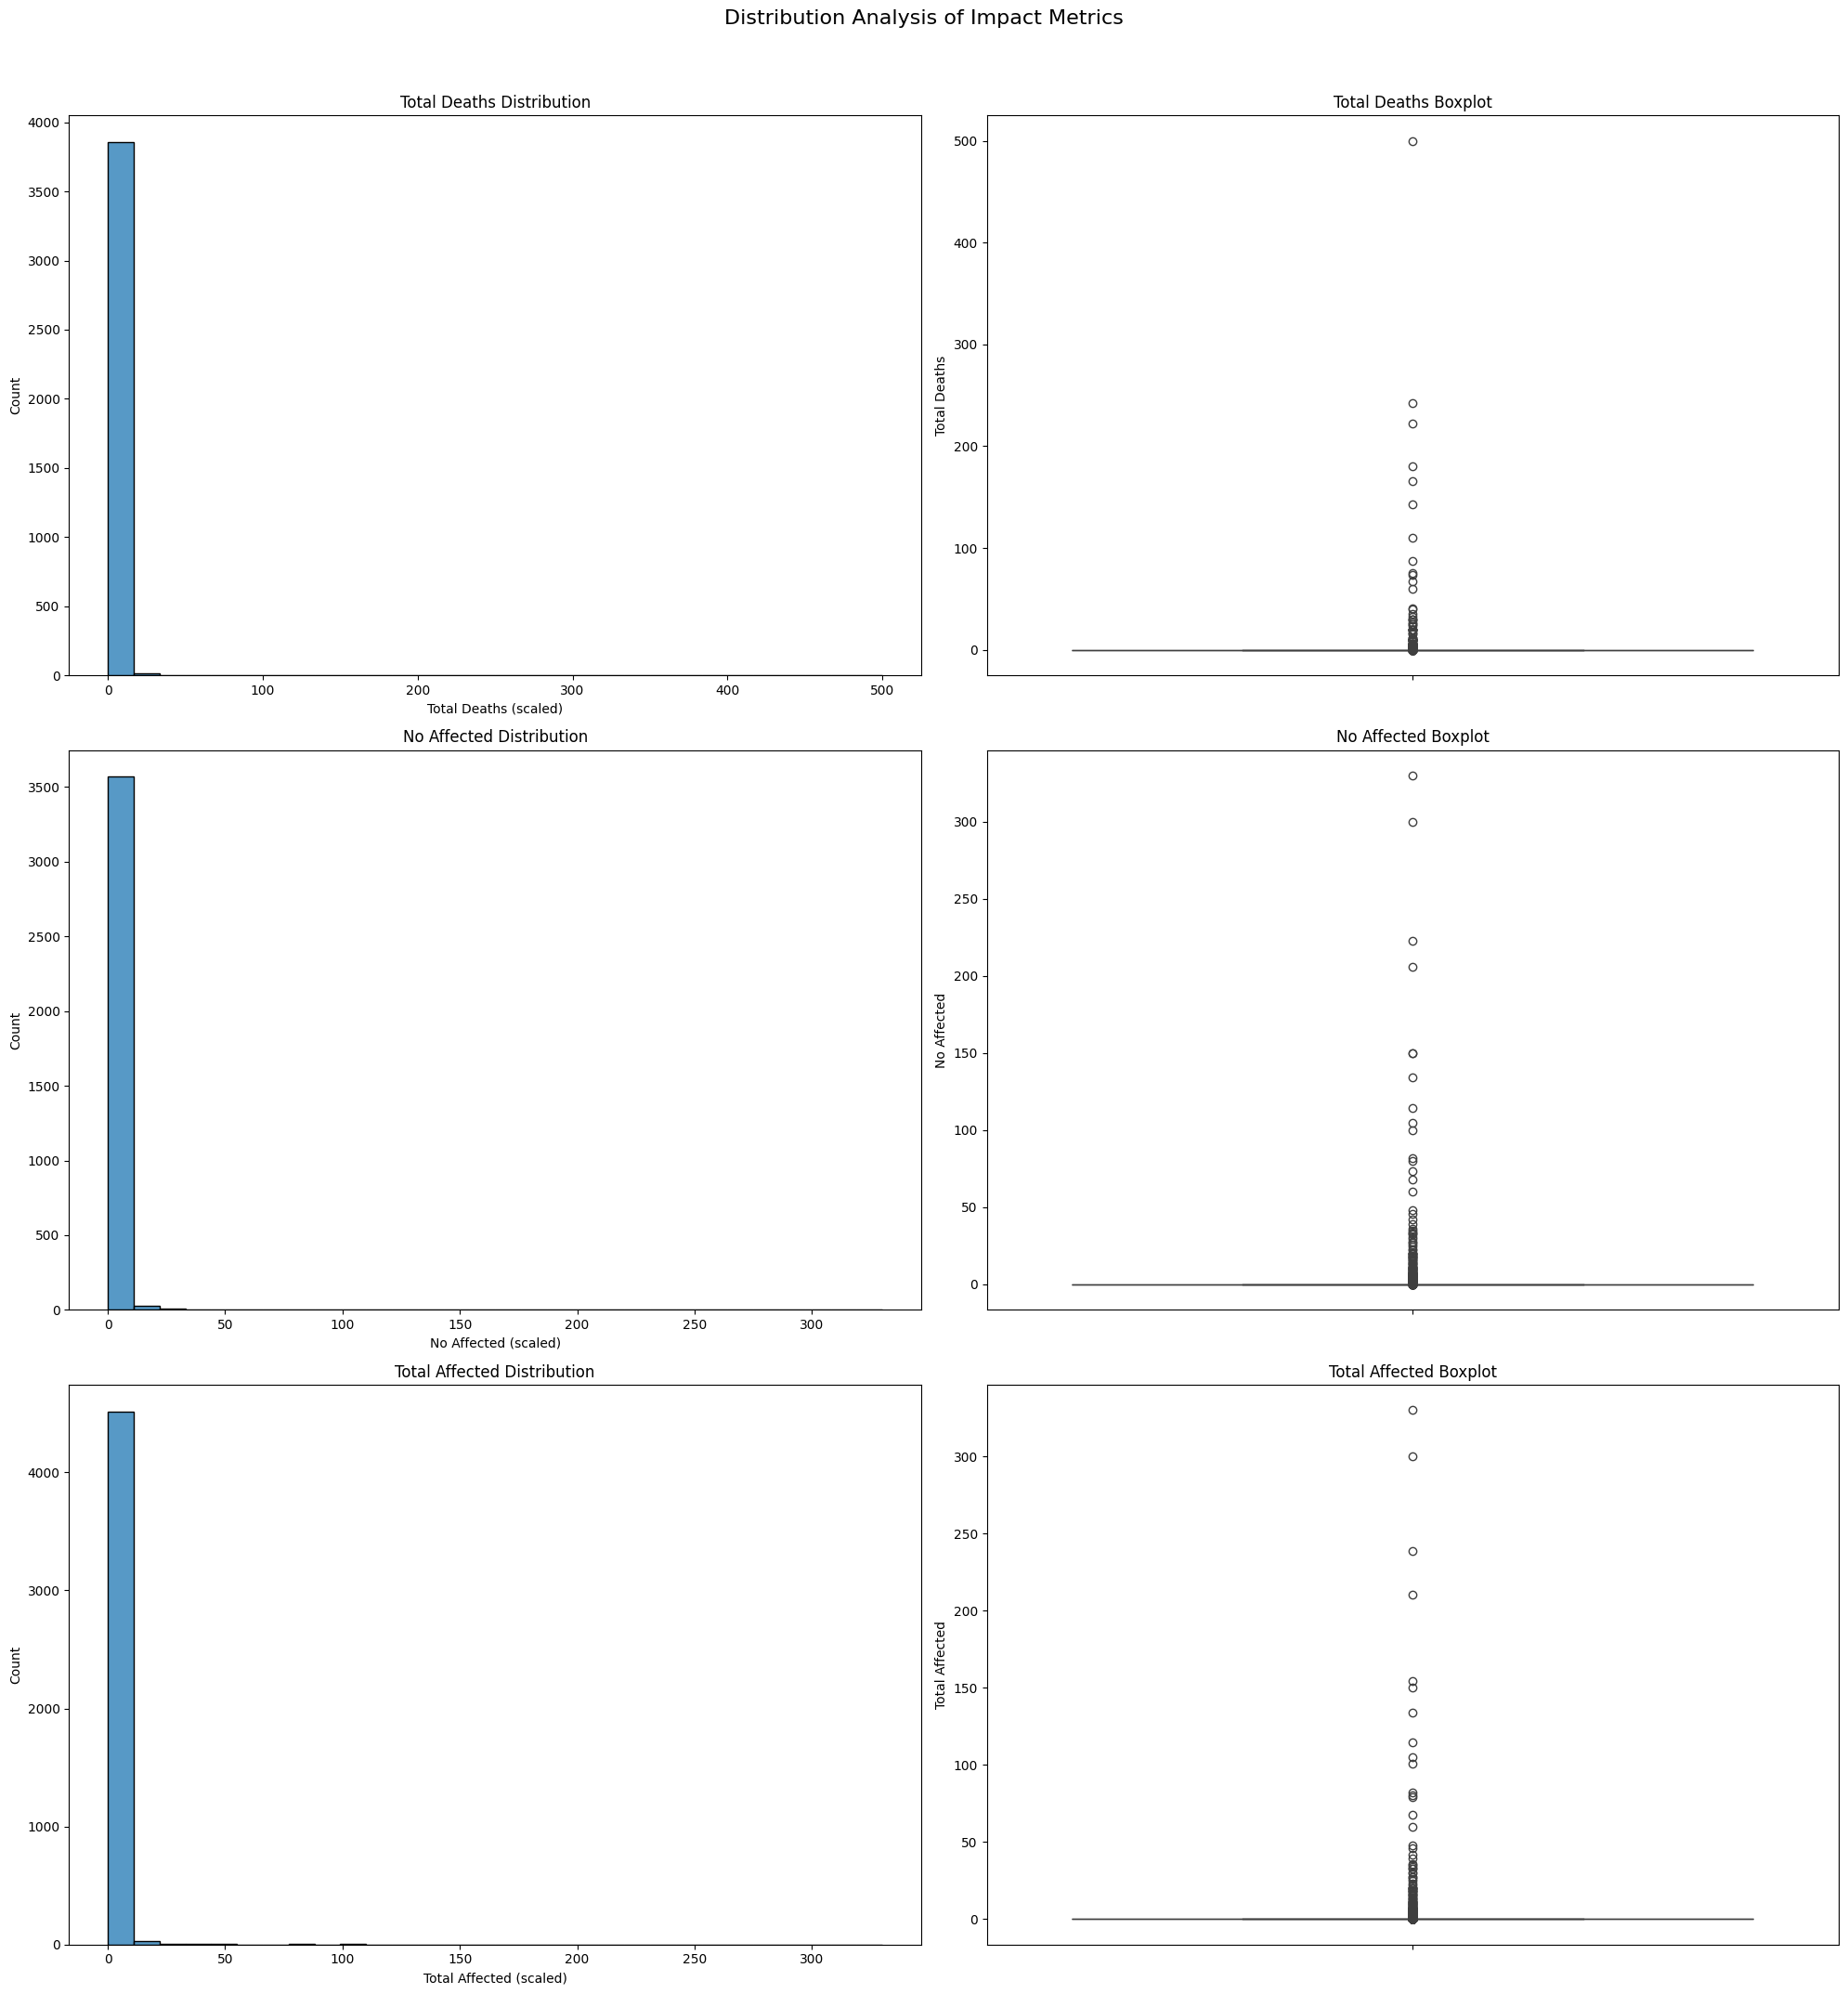


DATA CONSISTENCY CHECK:
Number of cases where Total Affected < No Affected: 1859
Percentage of inconsistent cases: 33.90%

Other Affected Statistics:
count    3625.000000
mean        0.016015
std         0.306971
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000050
max        15.973000
Name: Other_Affected, dtype: float64


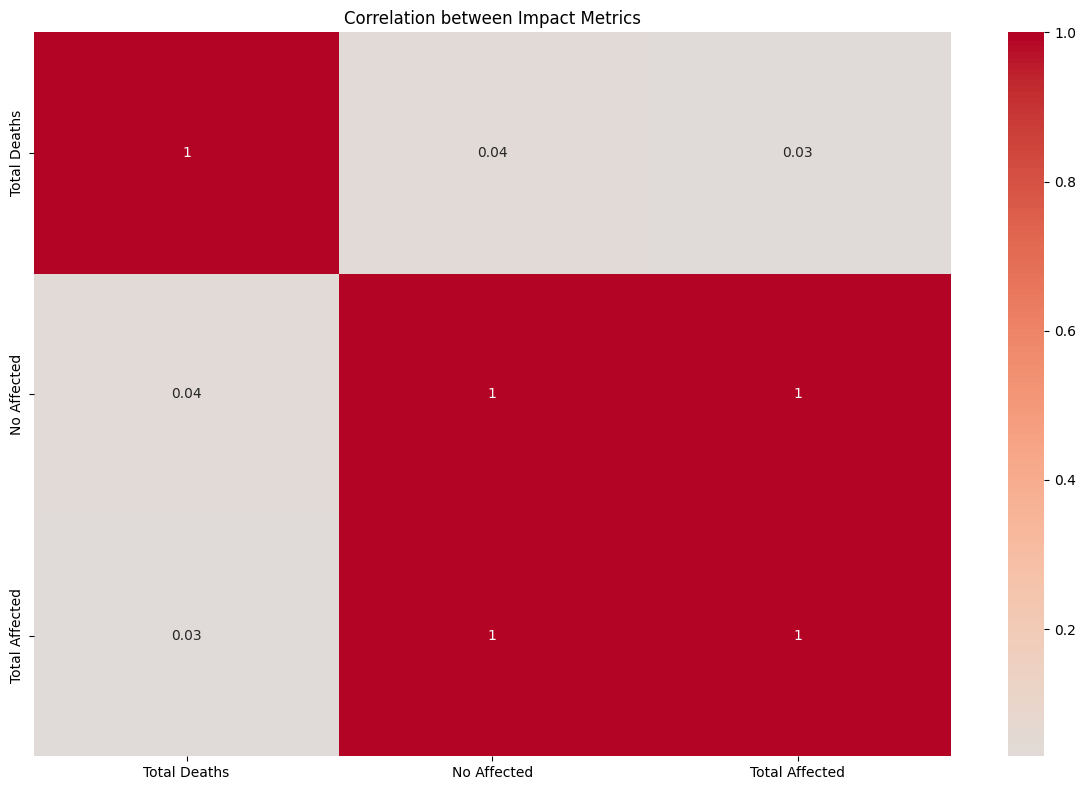

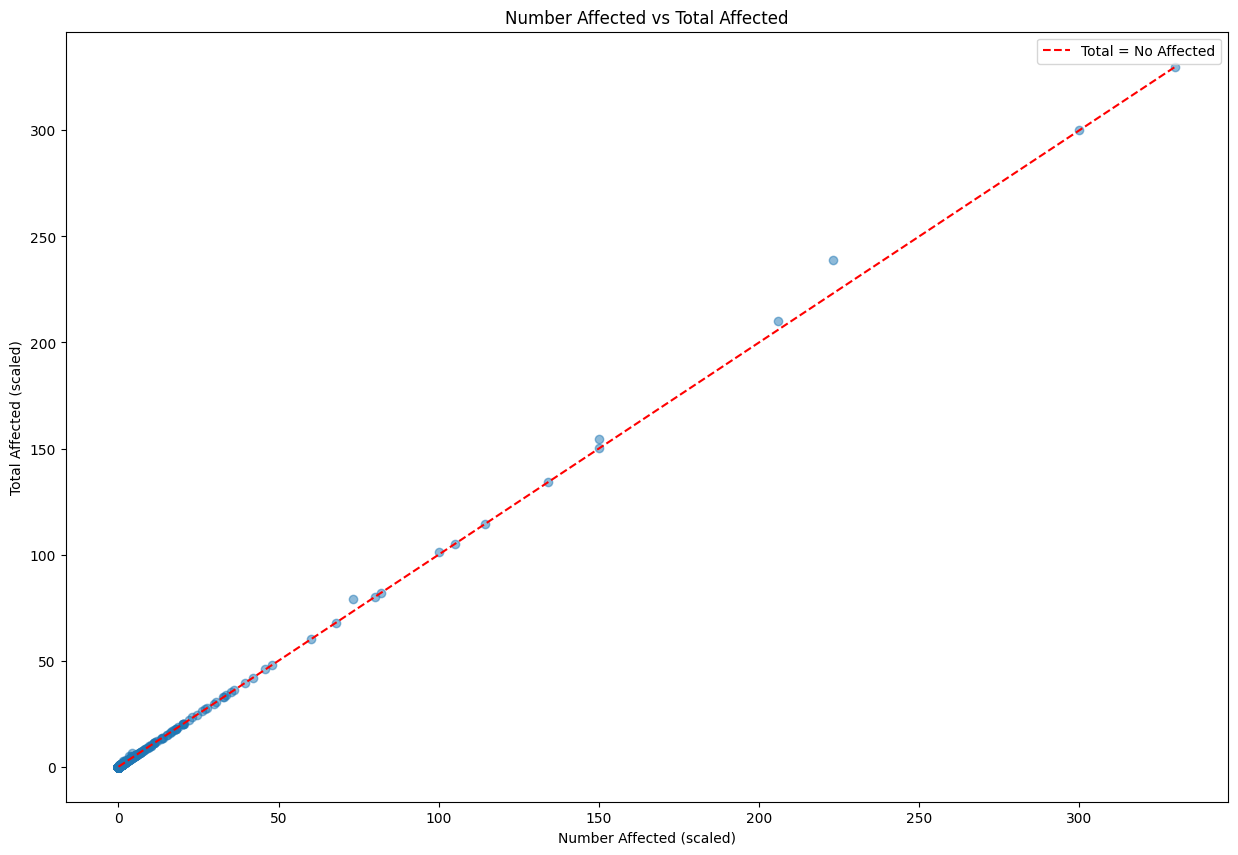

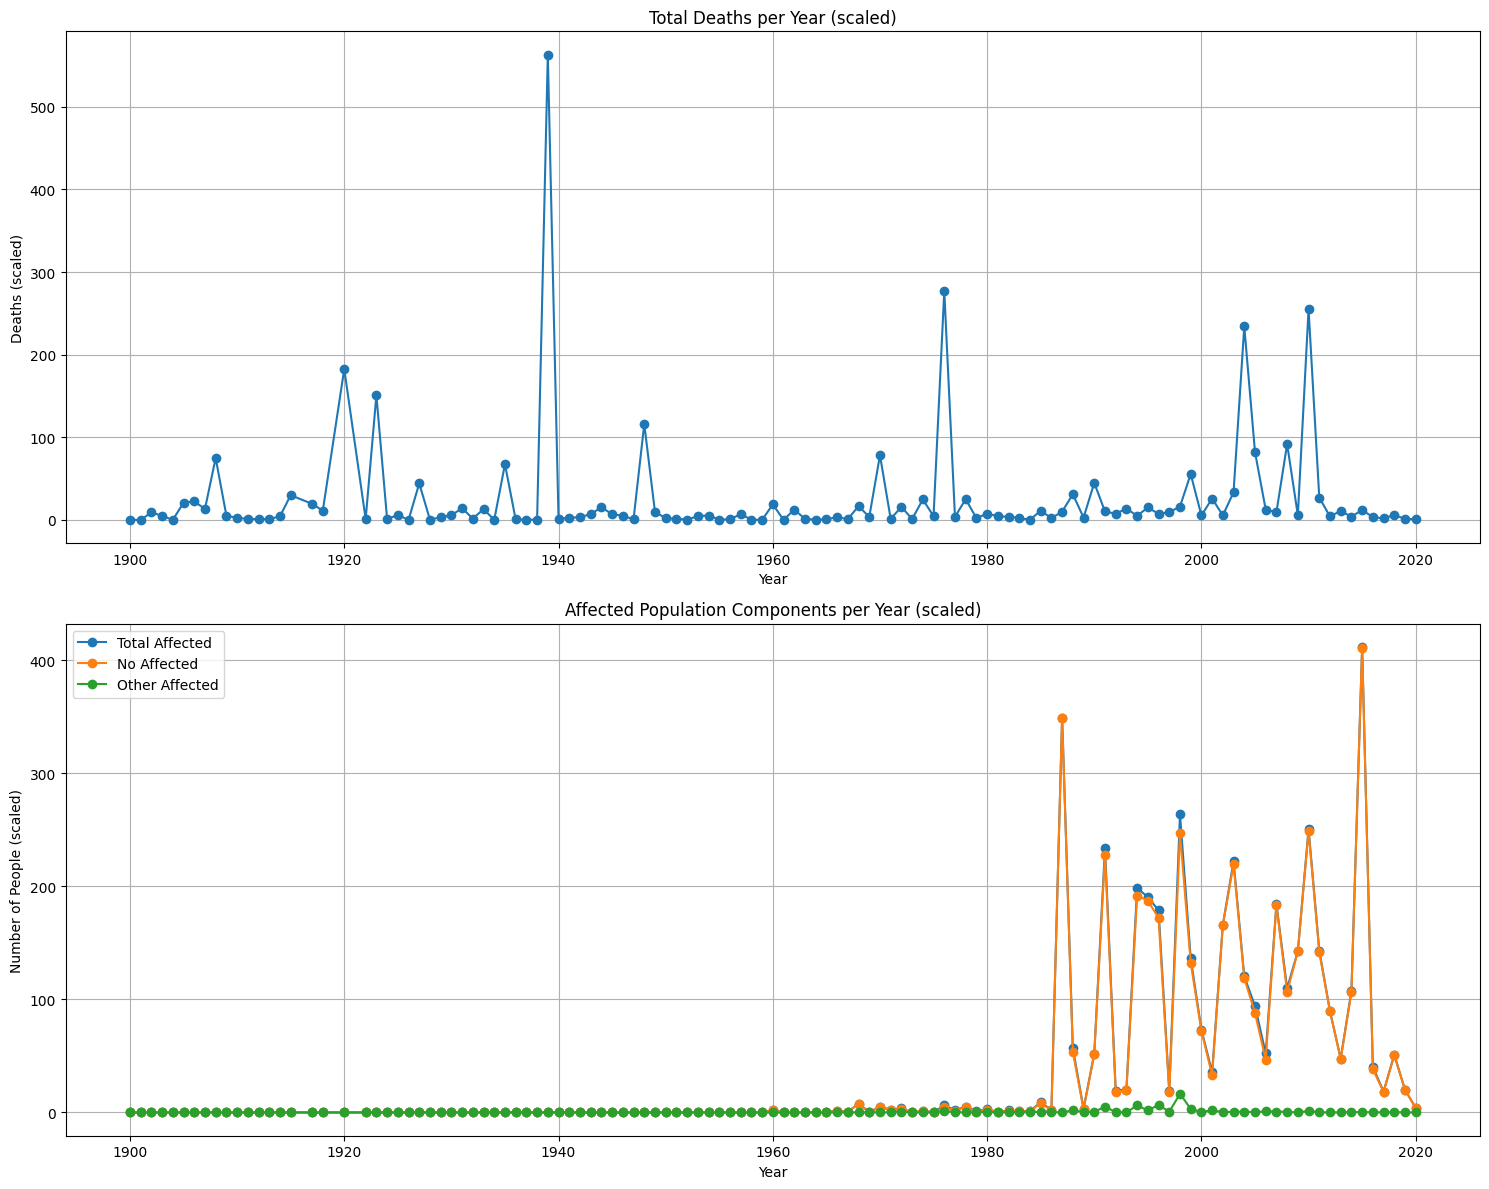

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    data = pd.read_csv(file_path, header='infer')
    print(f'Initial data: {data.shape[0]} instances, {data.shape[1]} attributes')
    return data

def filter_disaster_types(data, disaster_types):
    data = data[data['Disaster Type'].isin(disaster_types)]
    print(f'After filtering disaster types: {data.shape[0]} instances, {data.shape[1]} attributes')
    return data

def handle_missing_values(data):
    data = data.replace('?', np.nan)
    threshold = 0.5 * data.shape[0]
    data = data.drop(columns=[col for col in data.columns if data[col].isna().sum() > threshold])
    critical_cols = ['Disaster Subtype', 'Location', 'Start Month', 'End Month', 'CPI']
    data = data.dropna(subset=critical_cols)
    print(f'After handling missing values: {data.shape[0]} instances, {data.shape[1]} attributes')
    return data

def filter_non_biological(data):
    data = data[data['Disaster Group'] != 'Biological']
    print(f'After filtering non-biological disasters: {data.shape[0]} instances')
    return data

def convert_to_numeric(data, columns):
    for col in columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    print('Columns converted to numeric.')
    print(data[columns].dtypes)
    return data

def aggregate_data(data):
    agg_by_disaster = data.groupby('Disaster Type').agg({
        'Total Deaths': 'sum',
        'No Affected': 'sum',
        'Total Affected': 'sum'
    }).reset_index()
    print('Aggregation by Disaster Type:')
    print(agg_by_disaster.head())
    return agg_by_disaster

def plot_disaster_trends(agg_by_disaster):
    sns.barplot(data=agg_by_disaster, x='Disaster Type', y='Total Deaths')
    plt.title('Total Deaths by Disaster Type')
    plt.xticks(rotation=45)
    plt.show()

def plot_affected_by_disaster(agg_by_disaster):
    sns.barplot(data=agg_by_disaster, x='Disaster Type', y='Total Affected')
    plt.title('Total Affected by Disaster Type')
    plt.xticks(rotation=45)
    plt.show()

def plot_monthly_occurrence(data):
    agg_by_month = data.groupby(['Start Month']).size().reset_index(name='Disaster Count')
    sns.lineplot(data=agg_by_month, x='Start Month', y='Disaster Count')
    plt.title('Monthly Occurrence of Disasters')
    plt.show()

def plot_death_categories(data):
    sns.countplot(data=data, x='Deaths Category', palette='viridis')
    plt.title('Distribution of Death Categories')
    plt.show()

def plot_affected_categories(data):
    sns.countplot(data=data, x='Affected Category', palette='muted')
    plt.title('Distribution of Affected Categories')
    plt.show()

def categorize_impacts(data):
    bins_deaths = [-1, 0, 50, 500, 1000, float('inf')]
    labels_deaths = ['No Deaths', 'Low Impact', 'Moderate Impact', 'Severe Impact', 'Catastrophic']
    data['Deaths Category'] = pd.cut(data['Total Deaths'], bins=bins_deaths, labels=labels_deaths, right=False)
    bins_affected = [-1, 1000, 10000, 100000, float('inf')]
    labels_affected = ['Minimal Impact', 'Low Impact', 'Moderate Impact', 'High Impact']
    data['Affected Category'] = pd.cut(data['No Affected'], bins=bins_affected, labels=labels_affected, right=False)
    print('Impact categories added.')
    return data

def analyze_impact_metrics(data):
    print("\nDATA VALIDATION STATISTICS:")
    print("-" * 50)
    print("Missing Values Check:")
    missing_values = data.isnull().sum()
    print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

    print("\nNumerical Columns Statistics:")
    print(data[['Total Deaths', 'No Affected', 'Total Affected']].describe())

    print("\nData Types Verification:")
    print(data.dtypes[['Total Deaths', 'No Affected', 'Total Affected']])

    # Adjusting scale for plots
    data['Total Deaths'] /= 1e3
    data['No Affected'] /= 1e6
    data['Total Affected'] /= 1e6

    numeric_columns = ['Total Deaths', 'No Affected', 'Total Affected']

    fig, axes = plt.subplots(len(numeric_columns), 2, figsize=(20, 7*len(numeric_columns)))
    fig.suptitle('Distribution Analysis of Impact Metrics', y=1.02, fontsize=16)

    for idx, column in enumerate(numeric_columns):
        sns.histplot(data=data, x=column, ax=axes[idx, 0], bins=30)
        axes[idx, 0].set_title(f'{column} Distribution')
        axes[idx, 0].set_xlabel(f'{column} (scaled)')
        axes[idx, 0].set_ylabel('Count')

        sns.boxplot(data=data, y=column, ax=axes[idx, 1])
        axes[idx, 1].set_title(f'{column} Boxplot')

    plt.tight_layout()
    plt.show()

    total_affected_check = data['Total Affected'] >= data['No Affected']
    if not total_affected_check.all():
        print("\nDATA CONSISTENCY CHECK:")
        print(f"Number of cases where Total Affected < No Affected: {(~total_affected_check).sum()}")
        print("Percentage of inconsistent cases:",
              f"{(~total_affected_check).sum() / len(data) * 100:.2f}%")

    data['Other_Affected'] = data['Total Affected'] - data['No Affected']
    print("\nOther Affected Statistics:")
    print(data['Other_Affected'].describe())

    correlation = data[numeric_columns].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation between Impact Metrics')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(15, 10))
    plt.scatter(data['No Affected'], data['Total Affected'], alpha=0.5)
    plt.xlabel('Number Affected (scaled)')
    plt.ylabel('Total Affected (scaled)')
    plt.title('Number Affected vs Total Affected')

    max_val = max(data['Total Affected'].max(), data['No Affected'].max())
    plt.plot([0, max_val], [0, max_val], 'r--', label='Total = No Affected')
    plt.legend()
    plt.show()

    yearly_stats = data.groupby('Year').agg({
        'Total Deaths': 'sum',
        'Total Affected': 'sum',
        'No Affected': 'sum',
        'Other_Affected': 'sum'
    }).reset_index()

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

    ax1.plot(yearly_stats['Year'], yearly_stats['Total Deaths'], marker='o')
    ax1.set_title('Total Deaths per Year (scaled)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Deaths (scaled)')
    ax1.grid(True)

    ax2.plot(yearly_stats['Year'], yearly_stats['Total Affected'],
             label='Total Affected', marker='o')
    ax2.plot(yearly_stats['Year'], yearly_stats['No Affected'],
             label='No Affected', marker='o')
    ax2.plot(yearly_stats['Year'], yearly_stats['Other_Affected'],
             label='Other Affected', marker='o')
    ax2.set_title('Affected Population Components per Year (scaled)')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of People (scaled)')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


def main():
    file_path = '1900_2021_DISASTERS.xlsx - emdat data.csv'
    likely_disasters = ['Earthquake', 'Flood', 'Drought', 'Wildfire', 'Extreme temperature']
    numeric_columns = ['Year', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No Affected', 'Total Affected']
    check_numeric_columns = ['Total Deaths', 'No Affected', 'Total Affected']

    data = load_data(file_path)
    data = filter_disaster_types(data, likely_disasters)
    data = handle_missing_values(data)
    # data = handle_outliers(data, columns_to_check=check_numeric_columns)
    data = filter_non_biological(data)
    data = convert_to_numeric(data, numeric_columns)
    data = categorize_impacts(data)
    agg_by_disaster = aggregate_data(data)

    plot_disaster_trends(agg_by_disaster)
    plot_affected_by_disaster(agg_by_disaster)
    plot_monthly_occurrence(data)
    plot_death_categories(data)
    plot_affected_categories(data)
    data.to_csv('cleaned_disaster_data3.csv', index=False)
    analyze_impact_metrics(data)

if __name__ == '__main__':
    main()



## Data Processing Overview
### **Adding Terrain Information**
- Loads the cleaned disaster dataset (`cleaned_disaster_data3.csv`).
- Maps countries to their respective terrain types using a predefined dictionary.
- Adds a new `Terrain` column based on country mapping.
- Saves the updated dataset as `updated_disaster_data_with_terrain.csv`.

In [2]:
import pandas as pd

# Load your dataset
file_path = 'cleaned_disaster_data3.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Update the terrain mapping with the provided terrain types
updated_terrain_mapping = {
    "Afghanistan": "Mountainous",
    "Albania": "Mountainous, Coastal",
    "Algeria": "Desert, Oases",
    "Andorra": "Mountainous",
    "Angola": "Savanna, Plateaus",
    "Argentina": "High Plateaus",
    "Armenia": "Mountainous",
    "Australia": "Desert, Coastal",
    "Austria": "Mountainous",
    "Azerbaijan": "Mountainous, Plains",
    "Bahamas": "Coastal, Islands",
    "Bahrain": "Desert, Coastal",
    "Bangladesh": "Coastal, Plains",
    "Belarus": "Plains, Forests",
    "Belgium": "Plains, Coastal",
    "Belize": "Rainforest, Coastal",
    "Benin": "Savanna, Coastal",
    "Bhutan": "Mountainous",
    "Bolivia": "Mountainous, Plateaus",
    "Bosnia and Herzegovina": "Mountainous",
    "Botswana": "Desert, Savanna",
    "Brazil": "Rainforest, Coastal",
    "Brunei": "Rainforest, Coastal",
    "Bulgaria": "Mountainous, Plains",
    "Burkina Faso": "Savanna",
    "Burundi": "Mountainous, Plateaus",
    "Cambodia": "Plains, Forests",
    "Cameroon": "Coastal, Plateaus",
    "Canada": "Mountains, Plains",
    "Chile": "Mountainous, Coastal",
    "China": "High Plateaus, Diverse",
    "Colombia": "Mountainous",
    "Congo (DRC)": "Rainforest, Plateaus",
    "Costa Rica": "Coastal, Rainforest",
    "Croatia": "Coastal, Mountainous",
    "Cuba": "Coastal, Plains",
    "Cyprus": "Mountainous, Coastal",
    "Czech Republic": "Plains, Mountainous",
    "Denmark": "Plains, Coastal",
    "Djibouti": "Desert",
    "Dominica": "Mountainous, Coastal",
    "Dominican Republic": "Coastal, Mountainous",
    "Ecuador": "Mountainous, Coastal",
    "Egypt": "Desert",
    "El Salvador": "Coastal, Mountainous",
    "Equatorial Guinea": "Rainforest, Coastal",
    "Eritrea": "Desert, Coastal",
    "Estonia": "Plains, Coastal",
    "Eswatini": "Mountainous, Plateaus",
    "Ethiopia": "High Plateaus",
    "Fiji": "Coastal, Islands",
    "Finland": "Forests, Coastal",
    "France": "Coastal, Mountainous",
    "Gabon": "Rainforest, Coastal",
    "Gambia": "Coastal, Plains",
    "Georgia": "Mountainous, Coastal",
    "Germany": "Plains, Mountainous",
    "Ghana": "Coastal, Savanna",
    "Greece": "Mountainous, Coastal",
    "Guatemala": "Coastal, Mountainous",
      "Guinea": "Savanna, Coastal",
    "Guinea-Bissau": "Coastal, Plains",
    "Guyana": "Rainforest, Coastal",
    "Haiti": "Mountainous, Coastal",
    "Honduras": "Mountainous, Coastal",
    "Hungary": "Plains",
    "Iceland": "Mountainous, Coastal",
    "Indonesia": "Rainforest, Coastal",
    "Iran": "Mountainous, Desert",
    "Iraq": "Desert, Plains",
    "Ireland": "Coastal, Plains",
    "Israel": "Desert, Coastal",
     "India": "High Plateaus",
    "Italy": "Mountainous, Coastal",
    "Jamaica": "Mountainous, Coastal",
    "Jordan": "Desert",
    "Kazakhstan": "Plains, Deserts",
    "Kenya": "Savanna, Mountainous",
    "Kiribati": "Coastal, Islands",
    "Kuwait": "Desert",
    "Kyrgyzstan": "Mountainous",
    "Laos": "Mountainous, Rainforest",
    "Latvia": "Plains, Forests",
    "Lebanon": "Mountainous, Coastal",
    "Lesotho": "Mountainous",
    "Liberia": "Coastal, Rainforest",
    "Libya": "Desert",
    "Liechtenstein": "Mountainous",
    "Lithuania": "Plains, Forests",
    "Luxembourg": "Plains",
    "Madagascar": "Rainforest, Coastal",
    "Malawi": "Mountainous, Plateaus",
    "Malaysia": "Rainforest, Coastal",
    "Maldives": "Coastal, Islands",
    "Mali": "Desert, Savanna",
    "Malta": "Coastal, Plains",
    "Mauritania": "Desert",
    "Mauritius": "Coastal, Islands",
    "Mexico": "Desert, Coastal",
    "Moldova": "Plains",
    "Monaco": "Coastal",
    "Mongolia": "High Plateaus, Desert",
    "Montenegro": "Mountainous, Coastal",
    "Morocco": "Mountainous, Coastal",
    "Mozambique": "Coastal, Savanna",
    "Myanmar (Burma)": "Plains, Mountainous",
    "Namibia": "Desert, Savanna",
    "Nauru": "Coastal, Island",
    "Nepal": "Mountainous",
    "Netherlands": "Coastal, Plains",
    "New Zealand": "Mountainous, Coastal",
    "Nicaragua": "Coastal, Mountainous",
    "Niger": "Desert",
    "Nigeria": "Savanna, Coastal",
    "North Korea": "Mountainous, Coastal",
    "North Macedonia": "Mountainous",
    "Norway": "Mountainous, Coastal",
    "Oman": "Desert, Coastal",
    "Pakistan": "Mountainous, Desert",
    "Palau": "Coastal, Islands",
    "Panama": "Coastal, Rainforest",
    "Papua New Guinea": "Rainforest, Mountainous",
    "Paraguay": "Plains, Plateaus",
    "Peru": "Mountainous, Coastal",
    "Philippines": "Coastal, Rainforest",
    "Poland": "Plains",
    "Portugal": "Coastal, Mountainous",
    "Qatar": "Desert, Coastal",
    "Romania": "Mountainous, Plains",
    "Rwanda": "Mountainous",
    "Saint Kitts and Nevis": "Coastal, Islands",
    "Saint Lucia": "Coastal, Mountainous",
    "Saint Vincent and the Grenadines": "Coastal, Islands",
    "Samoa": "Coastal, Islands",
    "San Marino": "Mountainous",
    "Sao Tome and Principe": "Coastal, Rainforest",
    "Saudi Arabia": "Desert, Oases",
    "Senegal": "Coastal, Savanna",
    "Serbia": "Plains, Mountainous",
    "Seychelles": "Coastal, Islands",
    "Sierra Leone": "Coastal, Rainforest",
    "Singapore": "Coastal, Urban",
    "Slovakia": "Mountainous, Plains",
    "Slovenia": "Mountainous, Coastal",
    "Solomon Islands": "Coastal, Rainforest",
    "Somalia": "Desert, Coastal",
    "South Africa": "Savanna, Coastal",
    "South Korea": "Mountainous, Coastal",
    "Spain": "Mountainous, Coastal",
    "Sri Lanka": "Coastal, Rainforest",
    "Sudan": "Desert, Savanna",
    "Suriname": "Rainforest, Coastal",
    "Sweden": "Forests, Coastal",
    "Switzerland": "Mountainous",
    "Syria": "Desert, Plains",
    "Tajikistan": "Mountainous",
    "Tanzania": "Mountainous, Savanna",
    "Thailand": "Plains, Rainforest",
    "Timor-Leste": "Mountainous, Coastal",
    "Togo": "Coastal, Savanna",
    "Tonga": "Coastal, Islands",
    "Trinidad and Tobago": "Coastal, Rainforest",
    "Tunisia": "Desert, Coastal",
    "Turkey": "Mountainous, Coastal",
    "Turkmenistan": "Desert, Plains",
    "Tuvalu": "Coastal, Islands",
    "Uganda": "Mountainous, Plateaus",
    "Ukraine": "Plains",
    "United Arab Emirates": "Desert, Coastal",
    "United Kingdom": "Coastal, Mountainous",
    "United States": "Plains, Mountainous",
    "Uruguay": "Plains",
    "Uzbekistan": "Desert, Plains",
    "Vanuatu": "Coastal, Volcanic",
    "Vatican City": "Urban",
    "Venezuela": "Mountainous, Coastal",
    "Vietnam": "Rainforest, Coastal",
    "Yemen": "Desert, Mountainous",
    "Zambia": "Plateaus, Savanna",
    "Zimbabwe": "Plateaus, Savanna",
    "Antigua and Barbuda": "Coastal, Islands",
    "Cape Verde": "Coastal, Volcanic",
    "Central African Republic": "Savanna, Rainforest",
    "Comoros": "Coastal, Volcanic",
    "Congo (Congo-Brazzaville)": "Rainforest, Plateaus",
    "Fiji": "Coastal, Islands",
    "Grenada": "Coastal, Islands",
    "Kiribati": "Coastal, Islands",
    "Marshall Islands": "Coastal, Islands",
    "Micronesia": "Coastal, Islands",
    "Monaco": "Urban, Coastal",
    "Nauru": "Coastal, Island",
    "Palau": "Coastal, Islands",
    "Samoa": "Coastal, Islands",
    "Solomon Islands": "Coastal, Rainforest",
    "Tonga": "Coastal, Islands",
    "Tuvalu": "Coastal, Islands"
}


# Add the terrain column
data['Terrain'] = data['Country'].map(updated_terrain_mapping).fillna("Unknown")

# Save the updated dataset to a new CSV file
output_file_path = 'updated_disaster_data_with_terrain.csv'
data.to_csv(output_file_path, index=False)

print(f"Updated file saved as {output_file_path}")


Updated file saved as updated_disaster_data_with_terrain.csv


"""
## Disaster Prediction & Classsification Model

### 1. **Dataset Preparation**
- Loads the disaster dataset (`updated_disaster_data_with_terrain.csv`).
- Splits rows with multiple `Terrain` values into separate rows.
- Removes rows with missing or empty `Terrain` values.
- Saves the cleaned dataset as `updated_disaster_data_with_single_terrain.csv`.

### 2. **Feature Engineering & Model Training**
- One-hot encodes the `Terrain` type as categorical features.
- Uses disaster start/end dates and year-related features as predictors.
- Defines `Disaster Type` as the target variable.
- Splits the dataset into training (80%) and testing (20%) sets, ensuring stratified sampling.

### 3. **Classification Model (Decision Tree)**
- Trains a `DecisionTreeClassifier` with class balancing to predict the disaster type.
- Uses the following hyperparameters:
  - `max_depth=10`
  - `min_samples_leaf=5`
  - `min_samples_split=10`
  - `class_weight='balanced'`

### 4. **Performance Evaluation**
- Computes accuracy, precision, recall, and F1-score to measure model effectiveness.
- Generates a classification report for detailed performance insights.
- Creates a confusion matrix for error analysis.
- Identifies the most important features contributing to predictions.

### 5. **Visualization & Error Analysis**
- Plots:
  - **Confusion Matrix**: Shows prediction accuracy per disaster type.
  - **Feature Importance**: Highlights the top 15 most influential features.
  - **ROC Curves**: Evaluates model performance for each disaster type.
  - **Prediction Distribution**: Compares actual vs. predicted disasters.
  - **Error Analysis by Terrain**: Analyzes accuracy across different terrain types.

### 6. **Saving Results**
- Saves model evaluation metrics (`model_metrics.csv`).
- Exports feature importance rankings (`feature_importance.csv`).

This step helps understand which terrain types and temporal features influence disaster prediction the most and evaluates the classifier’s reliability.
"""



Preparing features...

Dataset Information:
Total samples: 8802

Feature distribution:
       Start Month    Start Day    End Month      End Day   Start Year  \
count  8802.000000  7850.000000  8802.000000  7832.000000  8802.000000   
mean      6.482163    15.244586     6.623040    15.766216  1998.940582   
std       3.300943     8.875840     3.278763     8.864457    19.807848   
min       1.000000     1.000000     1.000000     1.000000  1900.000000   
25%       4.000000     8.000000     4.000000     8.000000  1995.000000   
50%       7.000000    15.000000     7.000000    16.000000  2004.000000   
75%       9.000000    23.000000     9.000000    24.000000  2011.000000   
max      12.000000    31.000000    12.000000    31.000000  2020.000000   

          End Year  
count  8802.000000  
mean   1998.973642  
std      19.825749  
min    1900.000000  
25%    1995.000000  
50%    2004.000000  
75%    2011.000000  
max    2021.000000  

Class distribution:
Disaster Type
Flood         0.61781

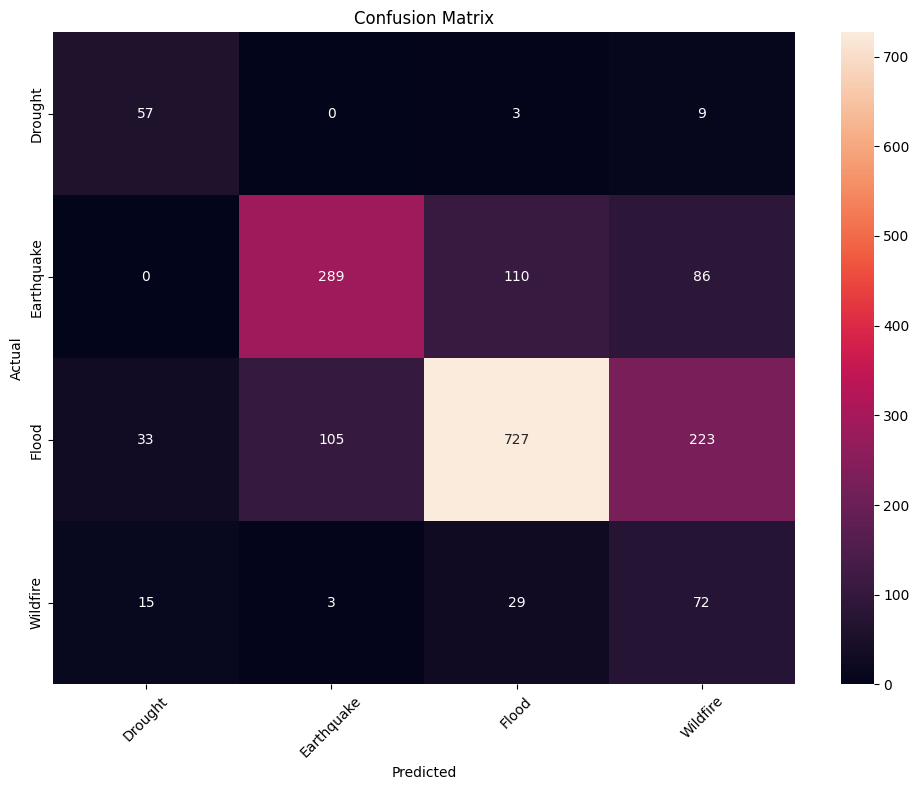

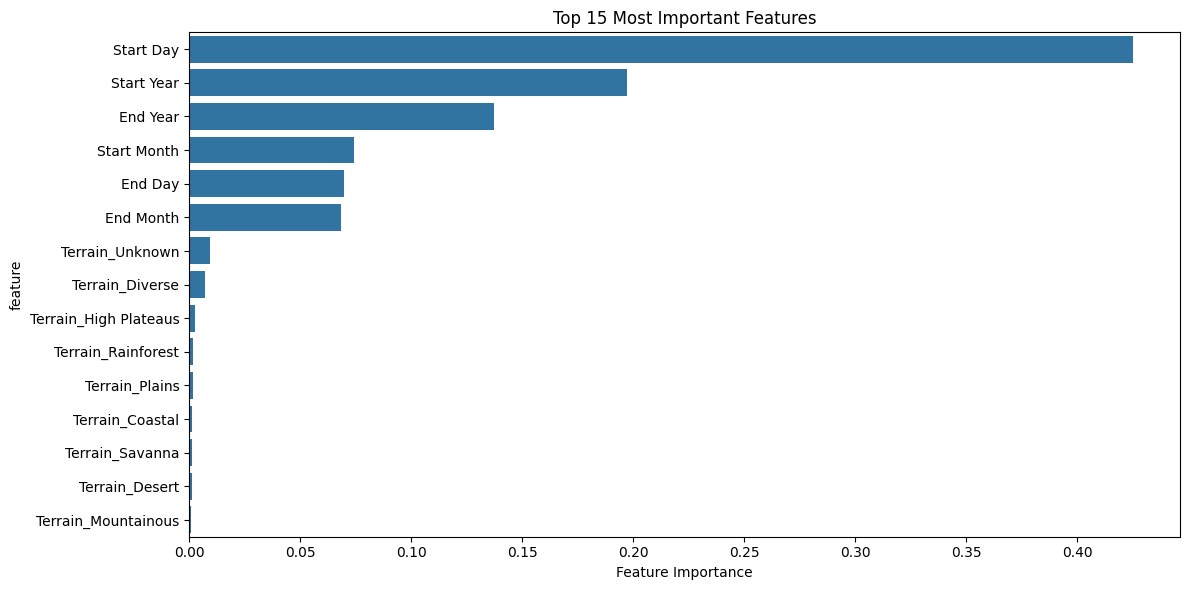

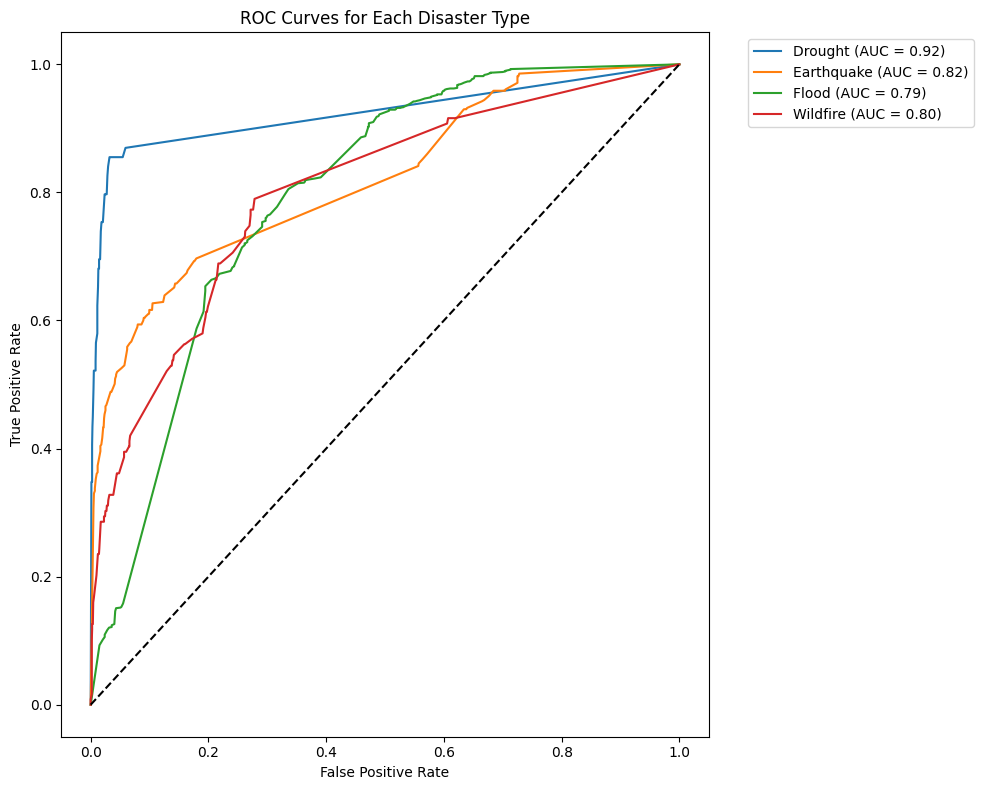

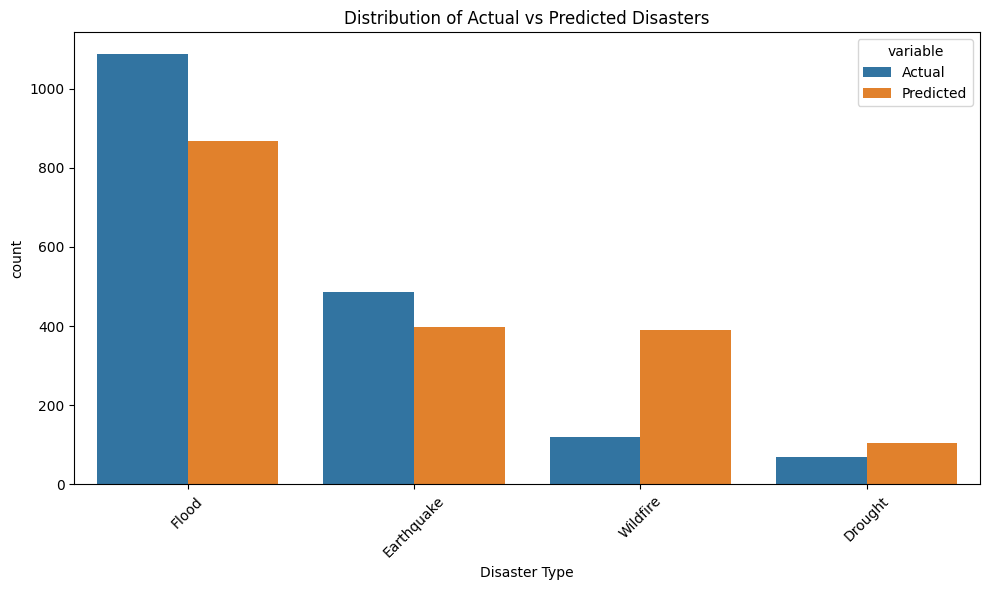

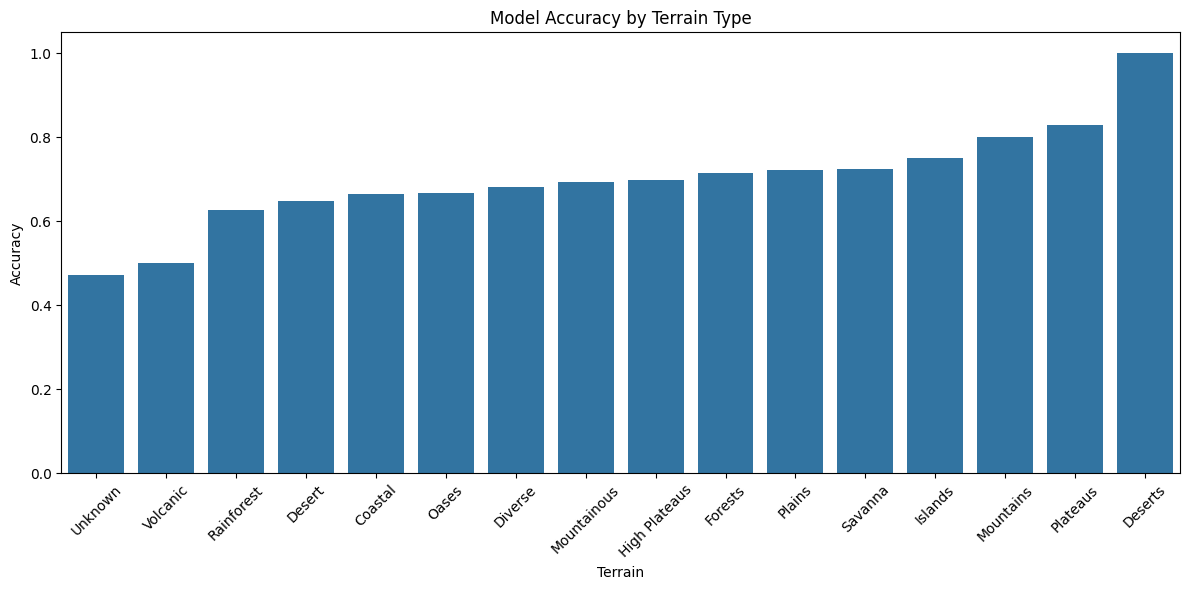

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

def train_and_evaluate_model(data):
    """
    Train and evaluate the disaster prediction model
    """
    # Prepare features
    print("\nPreparing features...")
    # Create dummy variables for terrain
    terrain_features = pd.get_dummies(data['Terrain'], prefix='Terrain')

    # Combine features
    X = pd.concat([
        terrain_features,
        data[['Start Month', 'Start Day', 'End Month', 'End Day', 'Start Year', 'End Year']]
    ], axis=1)

    y = data['Disaster Type']

    # Print dataset information
    print("\nDataset Information:")
    print(f"Total samples: {len(data)}")
    print("\nFeature distribution:")
    print(X.describe())
    print("\nClass distribution:")
    print(y.value_counts(normalize=True))

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train the classifier
    clf = DecisionTreeClassifier(
        max_depth=10,
        min_samples_leaf=5,
        min_samples_split=10,
        random_state=42,
        class_weight='balanced'
    )

    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print metrics
    print("\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1 Score: {f1:.3f}")

    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    # Visualizations

    # 1. Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=sorted(y.unique()),
                yticklabels=sorted(y.unique()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 2. Feature Importance
    plt.figure(figsize=(12, 6))
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': clf.feature_importances_
    }).sort_values('importance', ascending=False)

    sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
    plt.title('Top 15 Most Important Features')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

    # 3. ROC Curves
    plt.figure(figsize=(10, 8))
    for i, disaster_type in enumerate(clf.classes_):
        fpr, tpr, _ = roc_curve(
            (y_test == disaster_type).astype(int),
            y_pred_proba[:, i]
        )
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{disaster_type} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Each Disaster Type')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 4. Prediction Distribution
    plt.figure(figsize=(10, 6))
    pred_dist = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    }).melt()
    sns.countplot(data=pred_dist, x='value', hue='variable')
    plt.title('Distribution of Actual vs Predicted Disasters')
    plt.xlabel('Disaster Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 5. Error Analysis by Terrain
    error_analysis = pd.DataFrame({
        'Terrain': data.loc[y_test.index, 'Terrain'],
        'Actual': y_test,
        'Predicted': y_pred,
        'Correct': y_test == y_pred
    })

    plt.figure(figsize=(12, 6))
    terrain_accuracy = error_analysis.groupby('Terrain')['Correct'].mean().sort_values()
    sns.barplot(x=terrain_accuracy.index, y=terrain_accuracy.values)
    plt.title('Model Accuracy by Terrain Type')
    plt.xlabel('Terrain')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return clf, X.columns, {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'feature_importance': feature_importance
    }

def main():
    # Load the data
    data = pd.read_csv('updated_disaster_data_with_terrain.csv')
    df = pd.read_csv('updated_disaster_data_with_terrain.csv')

# Split rows with multiple terrains into separate rows
    df['Terrain'] = df['Terrain'].str.split(', ')  # Split terrains into lists
    df_exploded = df.explode('Terrain')

# Reset the index to avoid alignment issues
    df_exploded = df_exploded.reset_index(drop=True)

# Drop rows with missing or invalid terrain data
    df_exploded = df_exploded.dropna(subset=['Terrain'])
    df_exploded = df_exploded[df_exploded['Terrain'].str.strip() != '']

# Save the modified dataset
    df_exploded.to_csv('updated_disaster_data_with_single_terrain.csv', index=False)


    # Train and evaluate the model
    clf, feature_names, metrics = train_and_evaluate_model(df_exploded)

    # Save metrics to CSV
    pd.DataFrame([metrics]).to_csv('model_metrics.csv', index=False)

    # Save feature importance to CSV
    metrics['feature_importance'].to_csv('feature_importance.csv', index=False)

if __name__ == '__main__':
    main()

## Disaster Prediction Model for Algeria

### 1. Overview
This script implements a disaster prediction model specifically designed for Algeria. It leverages machine learning to forecast potential disasters across various regions by analyzing terrain types and temporal factors such as seasonality. The model employs a decision tree classifier, trained on historical disaster data, and allows users to input a specific time period for which predictions are made.

### 2. Why This Approach?
Algeria's diverse geography, which includes coastal areas, deserts, high plateaus, and mountainous regions, makes certain areas more susceptible to specific disasters at different times of the year. By incorporating historical data and seasonal patterns, the model enhances prediction accuracy by adjusting probabilities based on terrain type and seasonal risks. This enables more effective disaster preparedness and response strategies.

### 3. Key Features
- **User Input Handling**: The script prompts users to input a start and end date for the prediction period, ensuring flexibility and relevance to specific timeframes.
- **Machine Learning Model**: A decision tree classifier is trained on a dataset of disaster occurrences, utilizing features such as terrain type and temporal data (month, day, year).
- **Seasonal Adjustments**: The model adjusts disaster probabilities based on historical seasonal trends. For example:
  - **Summer (June-August)**: Increased risk of droughts and wildfires in desert regions.
  - **Winter (December-February)**: Higher likelihood of floods in coastal areas.
  - **Spring (March-May)**: Elevated flood risks in high plateaus and coastal regions.
  - **Autumn (September-November)**: Adjusted probabilities for floods and wildfires based on terrain.
- **Wilaya-Based Predictions**: The model generates predictions for each of Algeria's 48 wilayas (regions), taking into account their unique terrain characteristics. This granular approach ensures localized and accurate risk assessments.

### 4. Model Output
- **Detailed Predictions**: The script outputs a CSV file containing detailed predictions for each wilaya, including the predicted disaster type and its probability.
- **Summary Report**: A summary CSV file is generated, providing an overview of predicted disasters for each wilaya, along with their probabilities.
- **Visualizations**: The script produces two visualizations:
  1. A heatmap showing disaster probabilities by wilaya.
  2. A bar chart displaying the average probability of each disaster type across all wilayas.
- **Performance Metrics**: The model's performance is evaluated using metrics such as accuracy, precision, recall, and F1 score, ensuring reliability and transparency.


Model Performance Metrics:
Accuracy: 0.650
Precision: 0.751
Recall: 0.650
F1 Score: 0.684

Detailed Classification Report:
              precision    recall  f1-score   support

     Drought       0.54      0.83      0.66        69
  Earthquake       0.73      0.60      0.66       485
       Flood       0.84      0.67      0.74      1088
    Wildfire       0.18      0.61      0.28       119

    accuracy                           0.65      1761
   macro avg       0.57      0.67      0.58      1761
weighted avg       0.75      0.65      0.68      1761


Please enter the time period for prediction:

Predicting disasters for each wilaya...

Predictions saved to algeria_predictions_20250212_to_20260212.csv
Summary saved to algeria_predictions_summary_20250212_to_20260212.csv


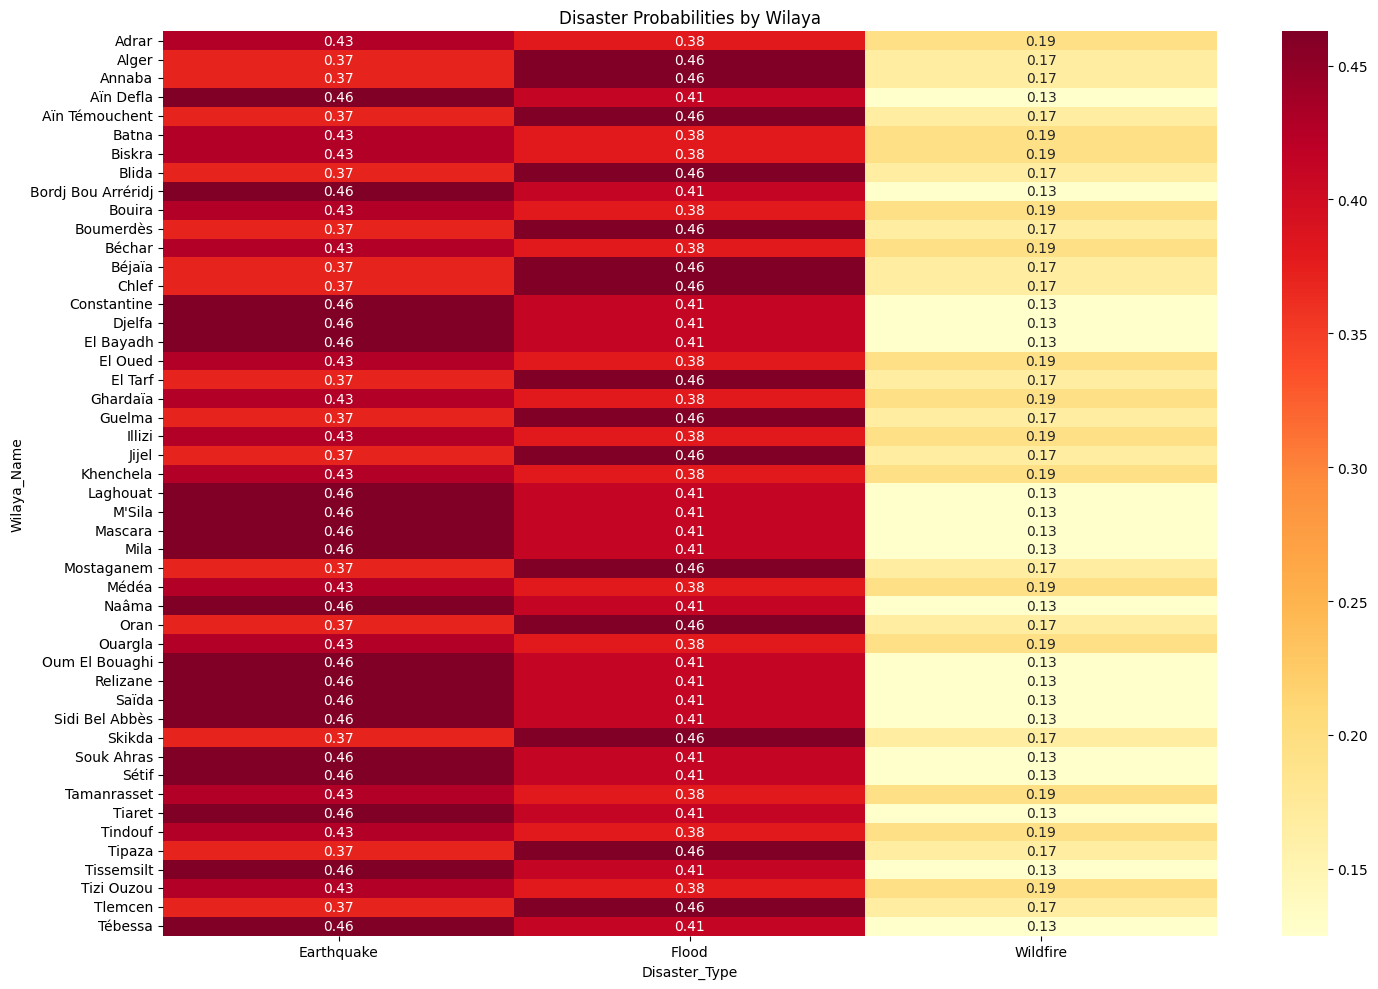

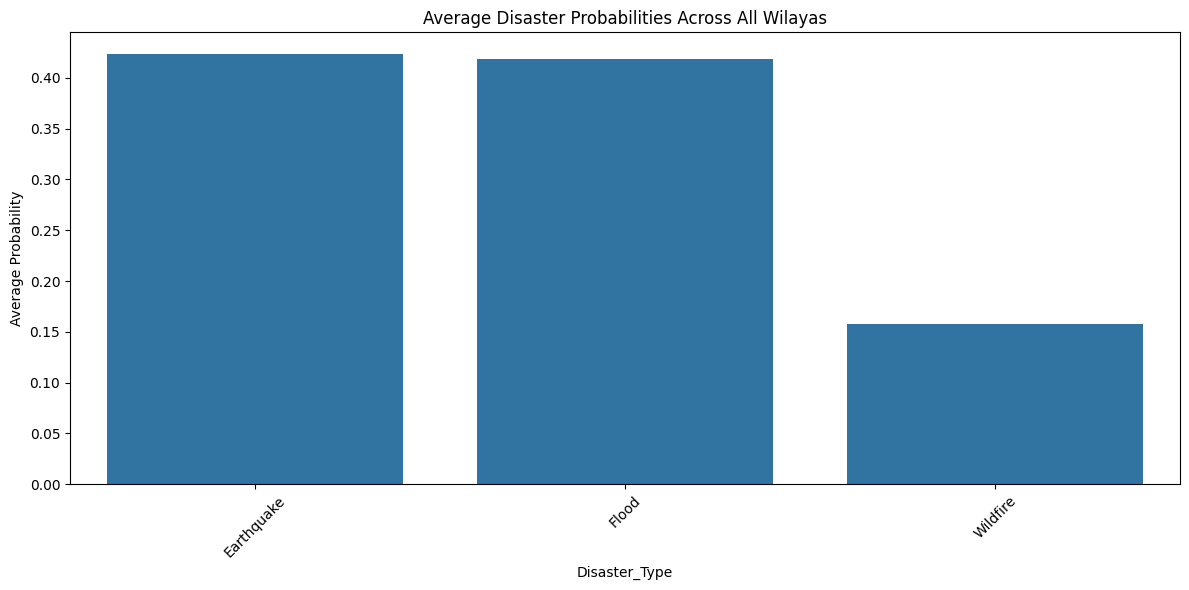


Prediction Summary:
Time period: 2025-02-12 to 2026-02-12
Number of wilayas analyzed: 48

Top predicted disasters by average probability:
Earthquake: 42.4%
Flood: 41.9%
Wildfire: 15.8%


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

def get_user_input():
    """
    Get temporal features from user input with validation
    """
    try:
        print("\nPlease enter the time period for prediction:")
        start_month = int(input("Start Month (1-12): "))
        while start_month < 1 or start_month > 12:
            print("Invalid month. Please enter a number between 1 and 12.")
            start_month = int(input("Start Month (1-12): "))

        start_day = int(input("Start Day (1-31): "))
        while start_day < 1 or start_day > 31:
            print("Invalid day. Please enter a number between 1 and 31.")
            start_day = int(input("Start Day (1-31): "))

        start_year = int(input("Start Year (e.g., 2023): "))
        while start_year < 1900 or start_year > 2100:
            print("Invalid year. Please enter a year between 1900 and 2100.")
            start_year = int(input("Start Year (e.g., 2023): "))

        end_month = int(input("End Month (1-12): "))
        while end_month < 1 or end_month > 12:
            print("Invalid month. Please enter a number between 1 and 12.")
            end_month = int(input("End Month (1-12): "))

        end_day = int(input("End Day (1-31): "))
        while end_day < 1 or end_day > 31:
            print("Invalid day. Please enter a number between 1 and 31.")
            end_day = int(input("End Day (1-31): "))

        end_year = int(input("End Year (e.g., 2023): "))
        while end_year < start_year:
            print("End year must be greater than or equal to start year.")
            end_year = int(input("End Year (e.g., 2023): "))

        return start_month, start_day, start_year, end_month, end_day, end_year

    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return get_user_input()

def train_disaster_classifier(data):
    """
    Train the disaster prediction model
    """
    # Create dummy variables for terrain
    terrain_features = pd.get_dummies(data['Terrain'], prefix='Terrain')

    # Combine features
    X = pd.concat([
        terrain_features,
        data[['Start Month', 'Start Day', 'End Month', 'End Day', 'Start Year', 'End Year']]
    ], axis=1)

    y = data['Disaster Type']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Train the classifier
    clf = DecisionTreeClassifier(
        max_depth=10,
        min_samples_leaf=5,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42
    )

    clf.fit(X_train, y_train)

    # Evaluate the model
    y_pred = clf.predict(X_test)
    print("\nModel Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.3f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.3f}")

    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    return clf, X.columns

def predict_disasters_for_algeria(clf, feature_names, algeria_wilayas):
    """
    Predict disasters for each wilaya based on terrain and temporal features
    """
    # Get time period from user
    start_month, start_day, start_year, end_month, end_day, end_year = get_user_input()

    # Calculate time difference
    start_date = datetime(start_year, start_month, start_day)
    end_date = datetime(end_year, end_month, end_day)

    # Initialize results list
    results = []

    print("\nPredicting disasters for each wilaya...")
    for _, wilaya_row in algeria_wilayas.iterrows():
        terrain = wilaya_row['Terrain']
        wilaya_name = wilaya_row['Wilaya_Name']

        # Create feature vector
        feature_vector = pd.DataFrame(0, index=[0], columns=feature_names)

        # Set terrain features
        terrain_col = f'Terrain_{terrain}'
        if terrain_col in feature_vector.columns:
            feature_vector[terrain_col] = 1

        # Set temporal features
        feature_vector['Start Month'] = start_month
        feature_vector['Start Day'] = start_day
        feature_vector['Start Year'] = start_year
        feature_vector['End Month'] = end_month
        feature_vector['End Day'] = end_day
        feature_vector['End Year'] = end_year

        # Adjust probabilities based on terrain and season
        base_proba = clf.predict_proba(feature_vector)[0]
        adjusted_proba = base_proba.copy()

        # Season-based adjustments
        if start_month in [6, 7, 8]:  # Summer
            if terrain == 'Desert':
                # Increase drought and wildfire probability in summer for desert
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Drought':
                        adjusted_proba[i] *= 1.5
                    elif disaster == 'Wildfire':
                        adjusted_proba[i] *= 1.3
                    elif disaster == 'Flood':
                        adjusted_proba[i] *= 0.1

            elif terrain == 'High Plateaus':
                # Increase wildfire probability in summer for high plateaus
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Wildfire':
                        adjusted_proba[i] *= 1.4

        elif start_month in [12, 1, 2]:  # Winter
            if terrain == 'Coastal':
                # Increase flood probability in winter for coastal areas
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Flood':
                        adjusted_proba[i] *= 1.4
            elif terrain == 'High Plateaus':
                # Decrease wildfire probability in winter
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Wildfire':
                        adjusted_proba[i] *= 0.6
        elif start_month in [3, 4, 5]:  # Spring
            if terrain == 'Coastal':
                # Spring adjustments for coastal areas
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Flood':
                        adjusted_proba[i] *= 1.2
                    elif disaster == 'Earthquake':
                        adjusted_proba[i] *= 1.1
            elif terrain == 'High Plateaus':
                # Spring adjustments for high plateaus
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Flood':
                        adjusted_proba[i] *= 1.3
                    elif disaster == 'Wildfire':
                        adjusted_proba[i] *= 0.8
            elif terrain == 'Desert':
                # Spring adjustments for desert
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Drought':
                        adjusted_proba[i] *= 1.2
                    elif disaster == 'Flood':
                        adjusted_proba[i] *= 0.1
        elif start_month in [9, 10, 11]:  # Autumn (September, October, November)
            if terrain == 'Coastal':
                # Autumn adjustments for coastal areas
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Flood':
                        adjusted_proba[i] *= 1.3
                    elif disaster == 'Wildfire':
                        adjusted_proba[i] *= 0.5
            elif terrain == 'High Plateaus':
                # Autumn adjustments for high plateaus
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Flood':
                        adjusted_proba[i] *= 1.2
                    elif disaster == 'Wildfire':
                        adjusted_proba[i] *= 0.6
            elif terrain == 'Mountainous':
                # Autumn adjustments for mountainous areas
                for i, disaster in enumerate(clf.classes_):
                    if disaster == 'Flood':
                        adjusted_proba[i] *= 1.4
                    elif disaster == 'Earthquake':
                        adjusted_proba[i] *= 1.1


        adjusted_proba = adjusted_proba / adjusted_proba.sum()

        # Add results for this wilaya
        for disaster_type, prob in zip(clf.classes_, adjusted_proba):
            if prob > 0.05:  # disasters with >5% probability
                results.append({
                    'Wilaya_Name': wilaya_name,
                    'Terrain': terrain,
                    'Disaster_Type': disaster_type,
                    'Probability': prob
                })


    results_df = pd.DataFrame(results)


    output_filename = f'algeria_predictions_{start_year}{start_month:02d}{start_day:02d}_to_{end_year}{end_month:02d}{end_day:02d}.csv'
    results_df.to_csv(output_filename, index=False)
    print(f"\nPredictions saved to {output_filename}")

    # Create summary DataFrame
    summary_df = results_df.groupby('Wilaya_Name').agg({
        'Terrain': 'first',
        'Disaster_Type': lambda x: ', '.join([f"{d} ({p:.1%})" for d, p in
                                            zip(x, results_df.loc[x.index, 'Probability'])]),
        'Probability': lambda x: ', '.join([f"{p:.1%}" for p in x])
    }).reset_index()

    # Save summary to CSV
    summary_filename = f'algeria_predictions_summary_{start_year}{start_month:02d}{start_day:02d}_to_{end_year}{end_month:02d}{end_day:02d}.csv'
    summary_df.to_csv(summary_filename, index=False)
    print(f"Summary saved to {summary_filename}")

    # visualizations
    plt.figure(figsize=(15, 10))
    pivot_data = results_df.pivot(index='Wilaya_Name', columns='Disaster_Type', values='Probability')
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title('Disaster Probabilities by Wilaya')
    plt.tight_layout()
    plt.show()

    # average probability by disaster type
    plt.figure(figsize=(12, 6))
    avg_probs = results_df.groupby('Disaster_Type')['Probability'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_probs.index, y=avg_probs.values)
    plt.title('Average Disaster Probabilities Across All Wilayas')
    plt.xticks(rotation=45)
    plt.ylabel('Average Probability')
    plt.tight_layout()
    plt.show()

    # summary
    print("\nPrediction Summary:")
    print(f"Time period: {start_date.date()} to {end_date.date()}")
    print(f"Number of wilayas analyzed: {len(algeria_wilayas)}")
    print("\nTop predicted disasters by average probability:")
    for disaster, avg_prob in avg_probs.items():
        print(f"{disaster}: {avg_prob:.1%}")

    return results_df, summary_df

def main():
    # the training data
    training_data = pd.read_csv('updated_disaster_data_with_single_terrain.csv')


    algeria_wilayas = pd.DataFrame({
        'Wilaya_Name': [
            'Adrar', 'Chlef', 'Laghouat', 'Oum El Bouaghi', 'Batna', 'Béjaïa', 'Biskra',
            'Béchar', 'Blida', 'Bouira', 'Tamanrasset', 'Tébessa', 'Tlemcen', 'Tiaret',
            'Tizi Ouzou', 'Alger', 'Djelfa', 'Jijel', 'Sétif', 'Saïda', 'Skikda',
            'Sidi Bel Abbès', 'Annaba', 'Guelma', 'Constantine', 'Médéa', 'Mostaganem',
            'M\'Sila', 'Mascara', 'Ouargla', 'Oran', 'El Bayadh', 'Illizi', 'Bordj Bou Arréridj',
            'Boumerdès', 'El Tarf', 'Tindouf', 'Tissemsilt', 'El Oued', 'Khenchela',
            'Souk Ahras', 'Tipaza', 'Mila', 'Aïn Defla', 'Naâma', 'Aïn Témouchent',
            'Ghardaïa', 'Relizane'
        ],
        'Terrain': [
            'Desert', 'Coastal', 'High Plateaus', 'High Plateaus', 'Mountainous', 'Coastal',
            'Desert', 'Desert', 'Coastal', 'Mountainous', 'Desert', 'High Plateaus', 'Coastal',
            'High Plateaus', 'Mountainous', 'Coastal', 'High Plateaus', 'Coastal', 'High Plateaus',
            'High Plateaus', 'Coastal', 'High Plateaus', 'Coastal', 'Coastal', 'High Plateaus',
            'Mountainous', 'Coastal', 'High Plateaus', 'High Plateaus', 'Desert', 'Coastal',
            'High Plateaus', 'Desert', 'High Plateaus', 'Coastal', 'Coastal', 'Desert',
            'High Plateaus', 'Desert', 'Mountainous', 'High Plateaus', 'Coastal', 'High Plateaus',
            'High Plateaus', 'High Plateaus', 'Coastal', 'Desert', 'High Plateaus'
        ]
    })


    clf, feature_names = train_disaster_classifier(training_data)


    detailed_predictions, summary_predictions = predict_disasters_for_algeria(clf, feature_names, algeria_wilayas)

if __name__ == '__main__':
    main()

## Disaster Clustering Overview

This script implements a clustering analysis on disaster data to identify patterns and groupings based on numerical and categorical features. The goal is to uncover hidden structures in the data that can help in understanding disaster characteristics and their relationships. Key steps include:

### 1. Data Preprocessing
- **Handling Missing Values**: Missing numerical values are imputed using the median, while categorical values are imputed using the most frequent value. This ensures that the dataset is complete and ready for analysis.
- **Feature Scaling**: Numerical features such as `Total Deaths`, `No Affected`, and `Total Affected` are standardized using `StandardScaler` to normalize the data. This is crucial for clustering algorithms that are sensitive to the scale of the data.
- **Log Transformation**: Numerical features with high skewness are log-transformed to reduce the impact of outliers and make the data more normally distributed.
- **Categorical Encoding**: Categorical features like `Terrain` are one-hot encoded to convert them into a numerical format suitable for clustering.

### 2. Determining Optimal Clusters
- **Elbow Method**: The inertia (sum of squared distances to the nearest cluster center) is plotted against the number of clusters to identify the "elbow" point, which suggests the optimal number of clusters.
- **Silhouette Score**: The silhouette score is calculated for different numbers of clusters to measure how similar an object is to its own cluster compared to other clusters. The number of clusters with the highest silhouette score is chosen as optimal.

### 3. Performing Clustering
- **KMeans**: A centroid-based clustering algorithm that partitions the data into `k` clusters by minimizing the variance within each cluster.
- **DBSCAN**: A density-based clustering algorithm that groups together points that are closely packed together, marking points that are far away as outliers. The `eps` parameter is automatically calculated based on the distances between points.
- **Agglomerative Clustering**: A hierarchical clustering algorithm that builds nested clusters by merging or splitting them successively.
- **Gaussian Mixture Model (GMM)**: A probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters.

### 4. Visualizing Clusters
- **Dimensionality Reduction**: Principal Component Analysis (PCA) is first applied to reduce the dimensionality of the data, followed by t-SNE (t-Distributed Stochastic Neighbor Embedding) to further reduce the data to 2 dimensions for visualization.
- **Cluster Visualization**: The clusters are visualized using scatter plots, with each cluster represented by a different color. The silhouette score for each clustering algorithm is displayed to evaluate the quality of the clustering.

### 5. Analyzing Cluster Characteristics
- **Numerical Features**: Boxplots are used to visualize the distribution of numerical features (`Total Deaths`, `No Affected`, `Total Affected`) across different clusters. This helps in understanding how these features vary between clusters.
- **Categorical Features**: Heatmaps are used to show the distribution of categorical features (`Terrain`) across clusters. This provides insights into how different terrains are associated with different clusters.


c:\Users\ZBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ZBOOK\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\ZBOOK\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ZBOOK\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

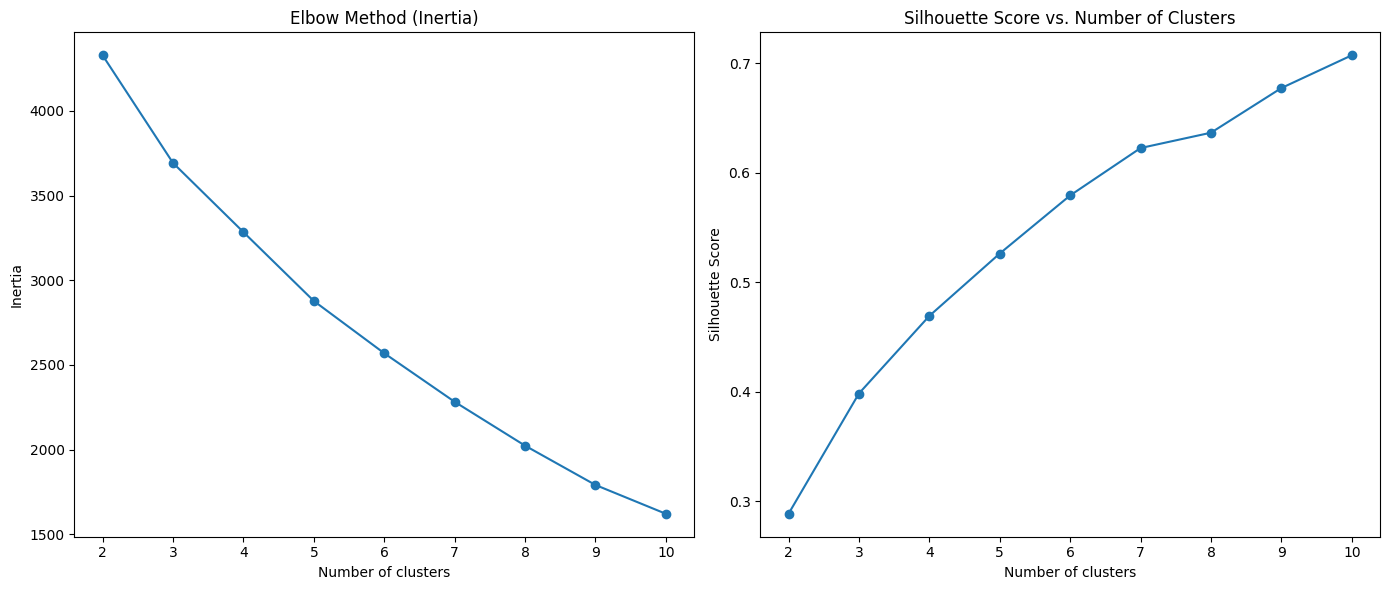

Optimal number of clusters based on silhouette score: 10
KMeans Silhouette Score: 0.707


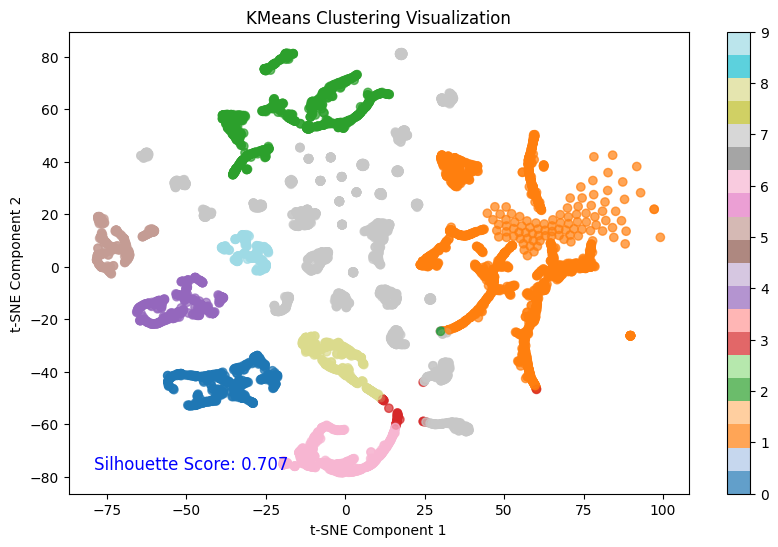

DBSCAN Silhouette Score: 0.850


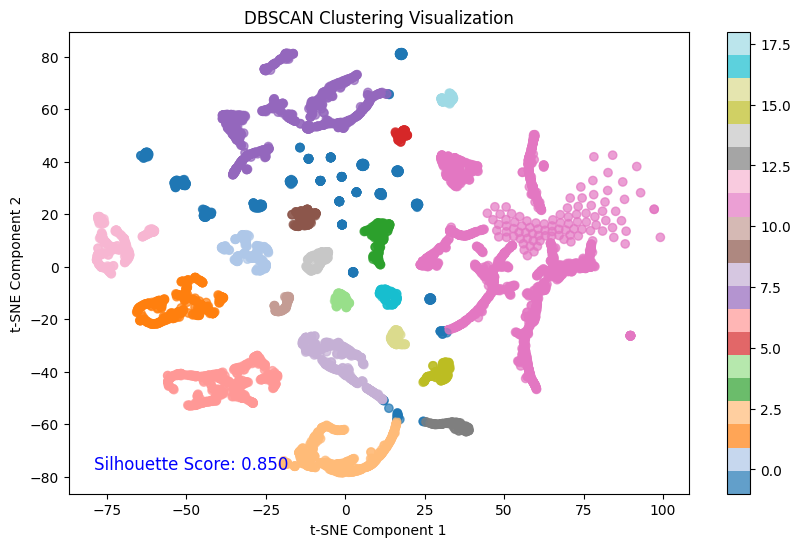

Agglomerative Silhouette Score: 0.329


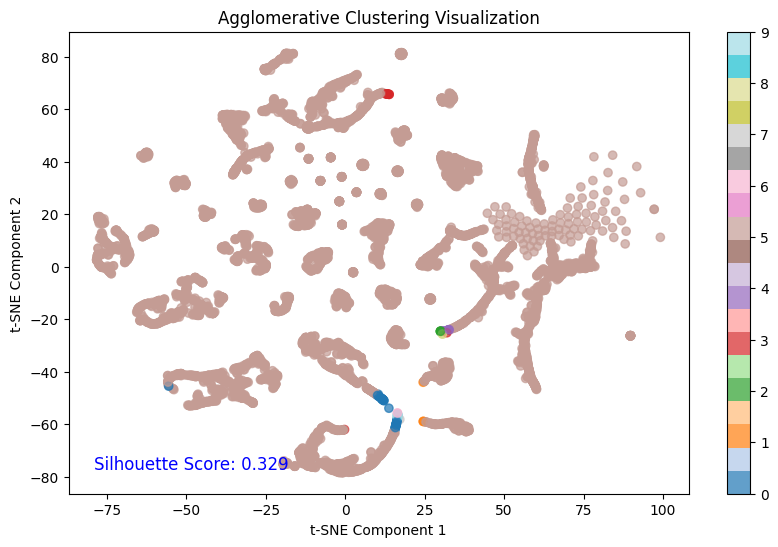

GMM Silhouette Score: 0.709


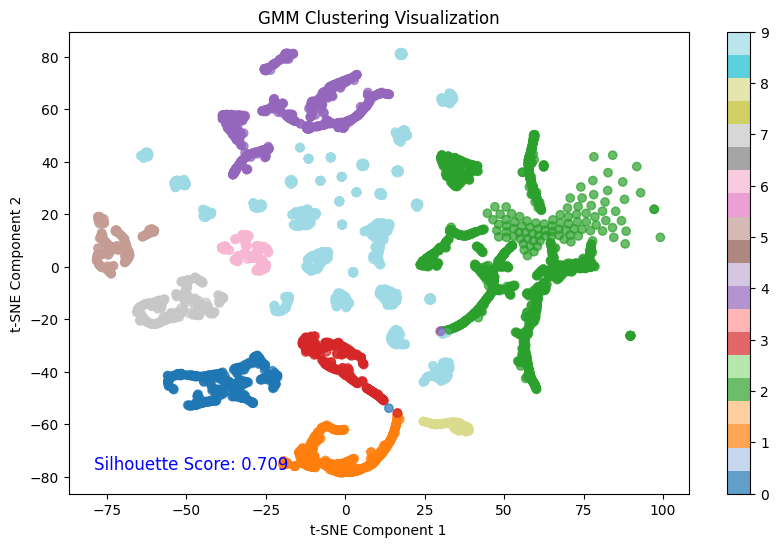

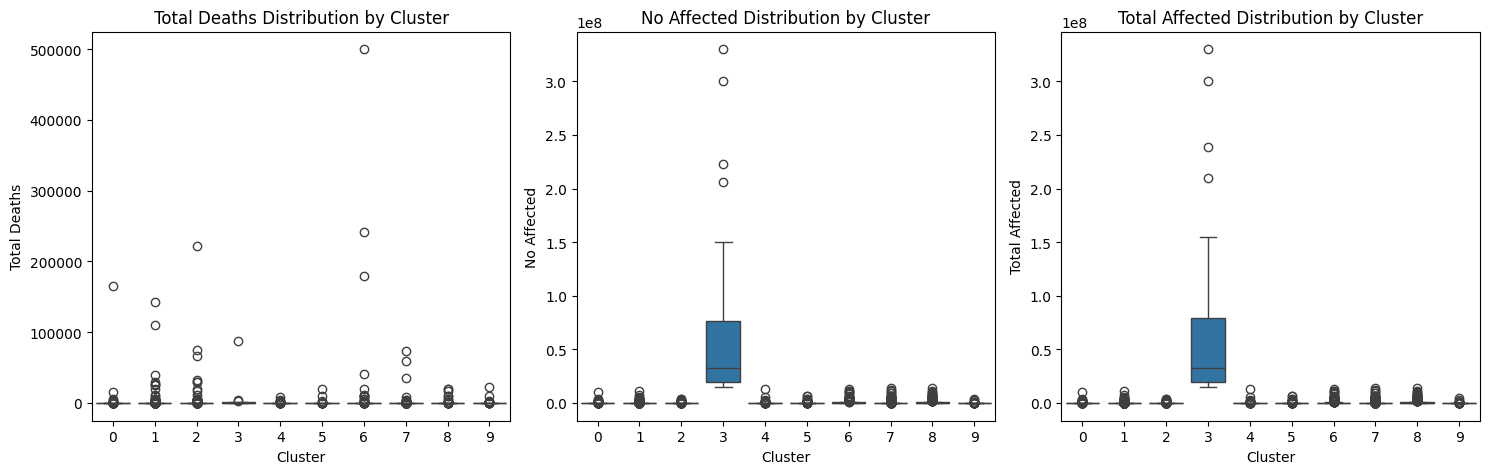

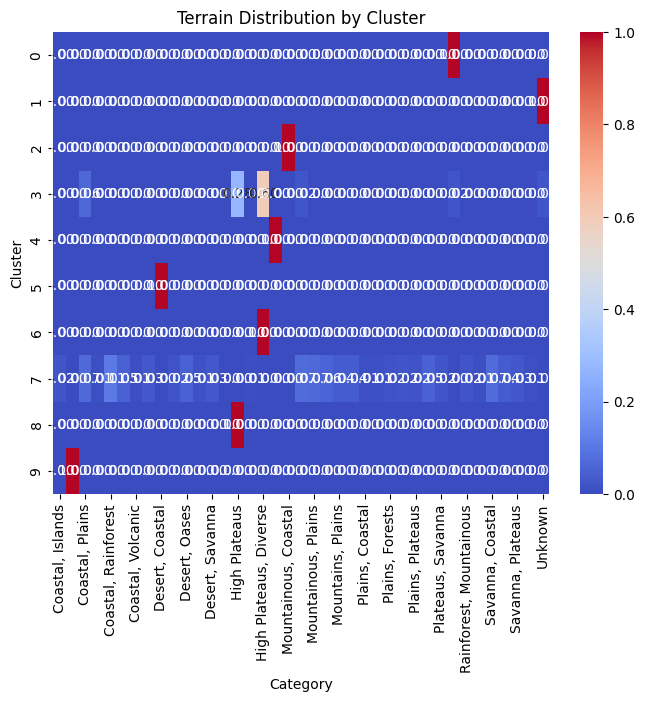

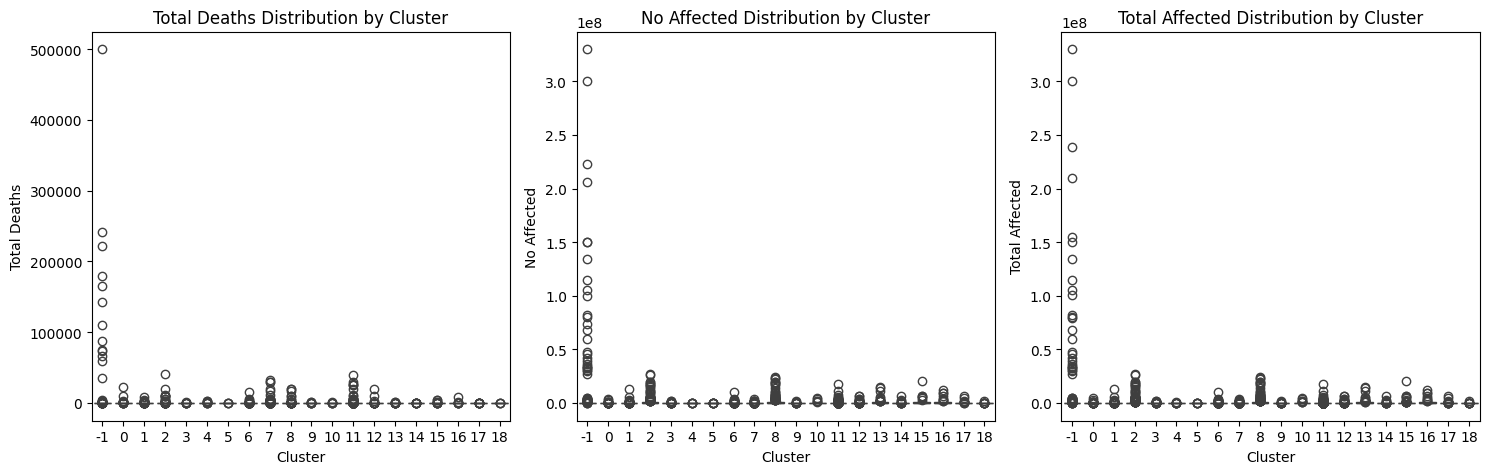

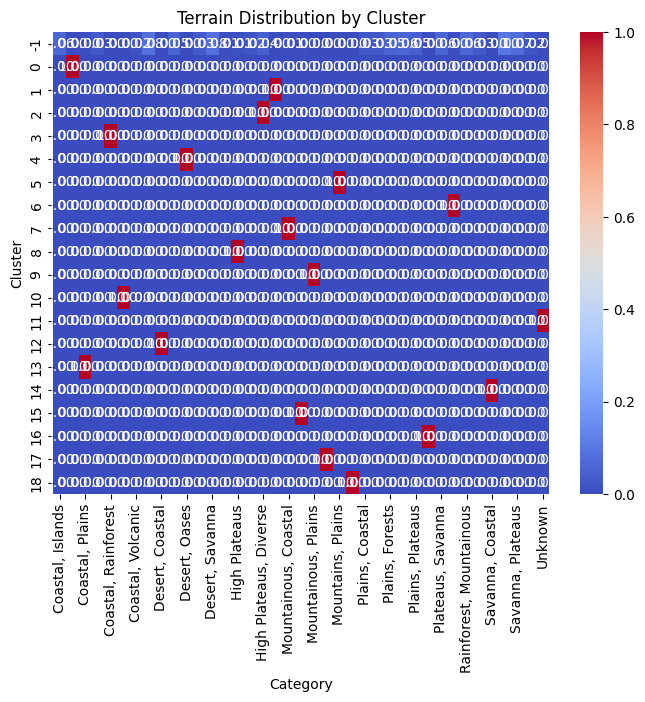

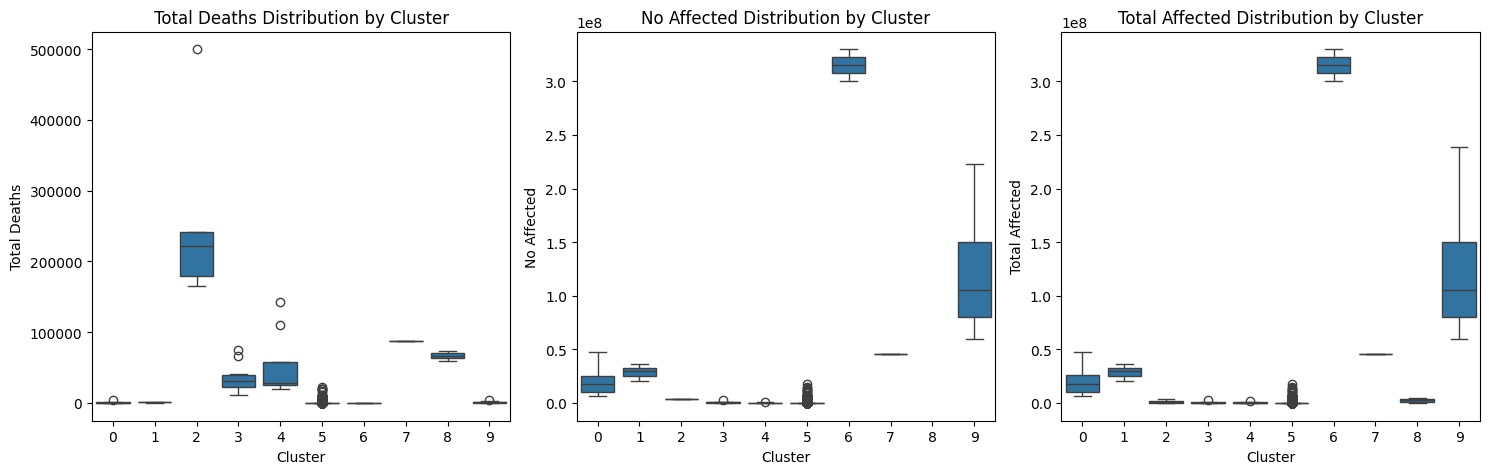

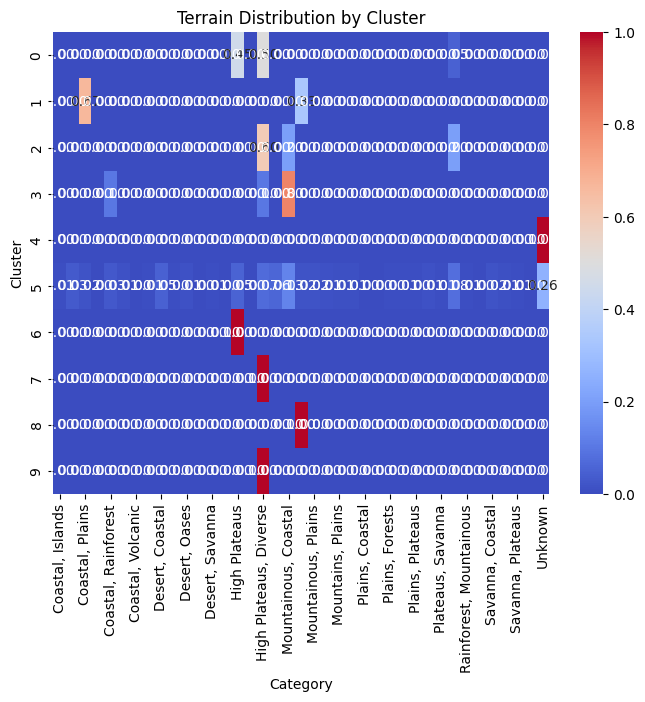

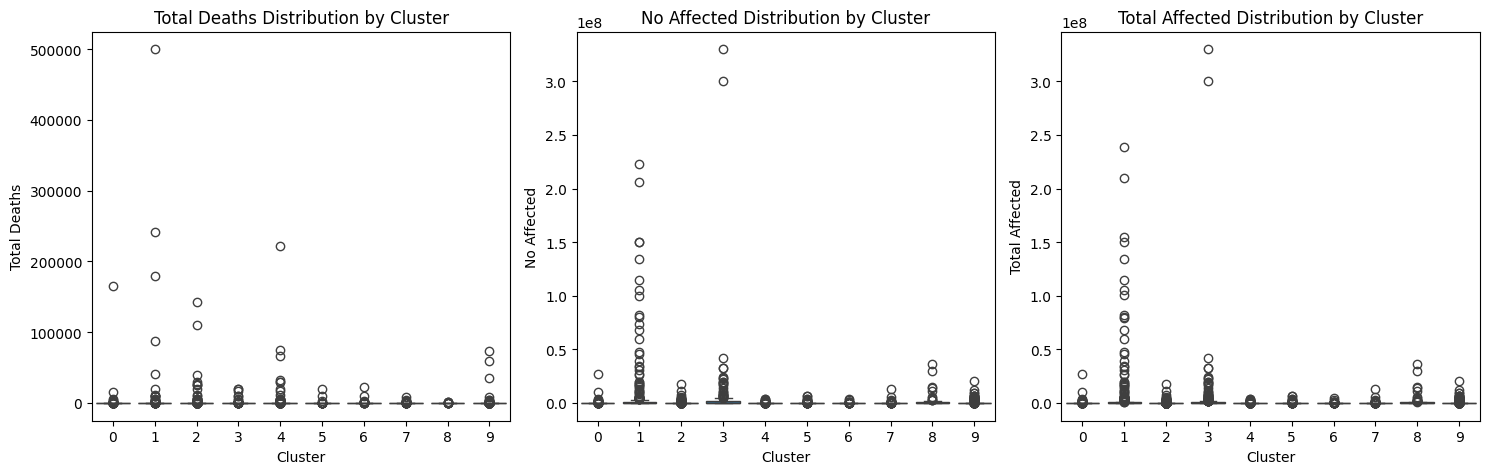

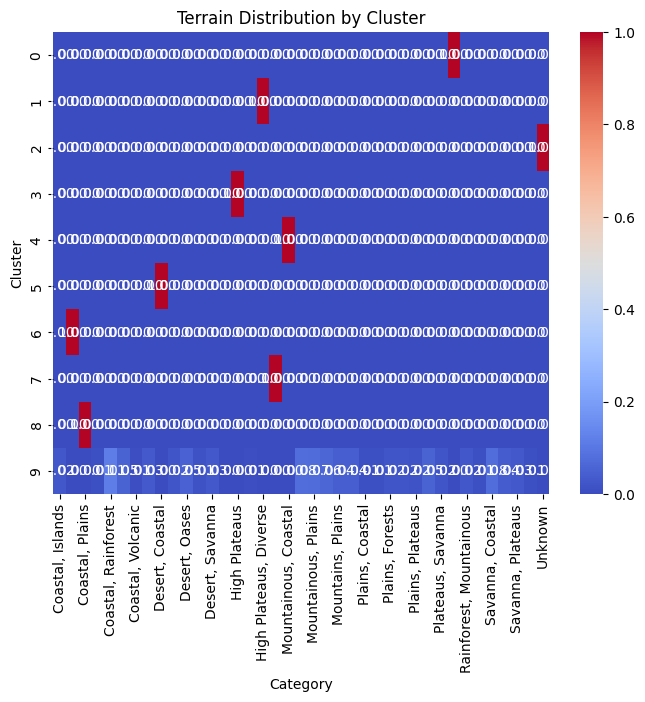

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

class DisasterClustering:
    def __init__(self, data):
        self.data = data
        self.numerical_features = ['Total Deaths', 'No Affected', 'Total Affected']
        self.categorical_features = ['Terrain']
        self.clustering_results = {}

    def preprocess_data(self):
        num_imputer = SimpleImputer(strategy='median')
        X_numerical = num_imputer.fit_transform(self.data[self.numerical_features])

        # Standard scaling to normalize the data (important for clustering)
        scaler = StandardScaler()
        X_numerical = scaler.fit_transform(X_numerical)

        # Log transform to handle skewness (right-skewed data is common in disaster data)
        for feature in self.numerical_features:
            if self.data[feature].skew() > 1:  # Apply log if skewness is high
                X_numerical[:, self.numerical_features.index(feature)] = np.log1p(X_numerical[:, self.numerical_features.index(feature)])

        cat_imputer = SimpleImputer(strategy='most_frequent')
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        X_categorical = encoder.fit_transform(cat_imputer.fit_transform(self.data[self.categorical_features]))

        # Combine numerical and categorical features
        self.X = np.hstack([X_numerical, X_categorical])
        return self.X

    def determine_optimal_clusters(self, max_clusters=10):
        # Elbow method to find the "elbow" where adding more clusters doesn't significantly improve inertia
        inertias = []
        silhouette_scores = []
        for n_clusters in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
            kmeans.fit(self.X)
            inertias.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(self.X, kmeans.labels_))

        # Plot inertia and silhouette score for cluster selection
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        plt.plot(range(2, max_clusters + 1), inertias, marker='o')
        plt.title('Elbow Method (Inertia)')
        plt.xlabel('Number of clusters')
        plt.ylabel('Inertia')

        plt.subplot(1, 2, 2)
        plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
        plt.title('Silhouette Score vs. Number of Clusters')
        plt.xlabel('Number of clusters')
        plt.ylabel('Silhouette Score')

        plt.tight_layout()
        plt.show()

        # Use silhouette score to select the optimal number of clusters
        optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
        print(f"Optimal number of clusters based on silhouette score: {optimal_clusters}")
        return optimal_clusters

    def perform_clustering(self, n_clusters):

        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
        self.clustering_results['KMeans'] = kmeans.fit_predict(self.X)

        # DBSCAN: Automatic eps calculation based on distances between points (more robust)
        distances = np.sort(kmeans.transform(self.X), axis=1)
        eps = np.percentile(distances[:, 0], 90)  # Use 90th percentile of distances
        dbscan = DBSCAN(eps=eps, min_samples=max(5, len(self.X) // 100))
        self.clustering_results['DBSCAN'] = dbscan.fit_predict(self.X)

        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
        self.clustering_results['Agglomerative'] = agglomerative.fit_predict(self.X)

        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        self.clustering_results['GMM'] = gmm.fit_predict(self.X)

    def visualize_clusters(self):
        # Reduce dimensions for better visualization (PCA then t-SNE for efficiency)
        pca = PCA(n_components=min(50, self.X.shape[0], self.X.shape[1]), random_state=42)
        X_pca = pca.fit_transform(self.X)
        tsne = TSNE(n_components=2, perplexity=30, random_state=42)
        X_tsne = tsne.fit_transform(X_pca)

        for algo_name, labels in self.clustering_results.items():
            plt.figure(figsize=(10, 6))
            scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='tab20', alpha=0.7)
            plt.title(f'{algo_name} Clustering Visualization')
            plt.colorbar(scatter)
            plt.xlabel('t-SNE Component 1')
            plt.ylabel('t-SNE Component 2')

            if len(np.unique(labels)) > 1:
                score = silhouette_score(self.X, labels)
                print(f"{algo_name} Silhouette Score: {score:.3f}")
                plt.figtext(0.15, 0.15, f'Silhouette Score: {score:.3f}', fontsize=12, color='blue', ha='left')

            plt.show()

    def analyze_cluster_characteristics(self):
        # Analyze cluster characteristics by plotting numerical and categorical distributions
        for algo_name, labels in self.clustering_results.items():
            cluster_data = self.data.copy()
            cluster_data['Cluster'] = labels

            # Boxplots for numerical features
            plt.figure(figsize=(15, 5))
            for i, feature in enumerate(self.numerical_features):
                plt.subplot(1, 3, i + 1)
                sns.boxplot(x='Cluster', y=feature, data=cluster_data)
                plt.title(f'{feature} Distribution by Cluster')
                plt.xlabel('Cluster')
                plt.ylabel(feature)
            plt.tight_layout()
            plt.show()

            # Heatmap for categorical feature distributions
            for feature in self.categorical_features:
                cluster_dist = pd.crosstab(cluster_data['Cluster'], cluster_data[feature], normalize='index')
                plt.figure(figsize=(8, 6))
                sns.heatmap(cluster_dist, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
                plt.title(f'{feature} Distribution by Cluster')
                plt.xlabel('Category')
                plt.ylabel('Cluster')
                plt.show()

def main():
    data = pd.read_csv('updated_disaster_data_with_terrain.csv')

    disaster_clustering = DisasterClustering(data)

    X = disaster_clustering.preprocess_data()

    optimal_clusters = disaster_clustering.determine_optimal_clusters()

    disaster_clustering.perform_clustering(optimal_clusters)

    disaster_clustering.visualize_clusters()

    disaster_clustering.analyze_cluster_characteristics()

if __name__ == '__main__':
    main()


## Conclusions

### 1. Data Preprocessing Conclusion
- The dataset was successfully reduced to a more manageable size, with irrelevant and missing data handled appropriately.
- The analysis revealed the following key insights:
  - **Floods** affect the most people.
  - **Earthquakes** cause the most fatalities.
  - **Wildfires** have the least overall impact.
- Data inconsistencies, such as cases where **Total Affected** is lower than **No Affected**, highlight the need for further data validation.
- The presence of extreme **outliers** suggests that disaster severity varies widely, making it challenging to model effectively.

### 2. Classification Model Conclusion
- The model achieved **65% accuracy**, indicating moderate performance but leaving room for improvement.
- Specific disaster predictions revealed:
  - **Floods**: The best-predicted class with high precision (84%) and reasonable recall (67%), indicating reliable identification with minimal false positives.
  - **Earthquakes**: Good precision (73%) but lower recall (60%), meaning some earthquakes are not being predicted.
  - **Droughts**: High recall (83%), but lower precision (54%), suggesting frequent false positives and an overprediction bias.
  - **Wildfires**: The most challenging to predict, with very low precision (18%) and moderate recall (61%), making wildfire predictions highly unreliable.
- The model appears biased towards floods due to their high frequency and struggles with wildfires, likely due to class imbalances.
- Overall, the classification model is moderately effective, but substantial refinements are needed to improve precision and recall, especially for underperforming disaster types.

### 3. Clustering Algorithm Conclusion
- **DBSCAN** was the most effective clustering method with a **silhouette score of 0.850**, identifying natural disaster groupings without enforcing a fixed number of clusters.
- **KMeans** and **Gaussian Mixture Model (GMM)** performed similarly with a **silhouette score around 0.70**, but struggled with high variance in disaster severity.
- **Agglomerative Clustering** was the least effective with a **silhouette score of 0.329**, due to its difficulty in handling variable disaster data.
- Cluster analysis revealed high-impact **outliers**, suggesting that certain disasters are significantly more severe than others.

## Final General Conclusion
This analysis of natural disasters in Algeria provides a solid foundation for understanding disaster impacts and developing prediction models. Despite challenges such as missing data and the inherent variability in disaster severity, our work has produced valuable insights into the key disaster types affecting the region. The classification model demonstrates solid **precision** for certain disaster types like **floods**, indicating that with further refinement, it could serve as a useful tool for identifying high-impact events. Additionally, the clustering analysis, particularly through **DBSCAN**, effectively identifies natural groupings in disaster data, providing valuable insights into how disasters vary in terms of impact and distribution. These findings could inform targeted disaster preparedness strategies, improve response times, and help allocate resources more efficiently. While the work is still a work in progress, it lays the groundwork for building more reliable systems to predict and analyze natural disasters in Algeria, ultimately contributing to better disaster management and risk mitigation efforts.